In [ ]:
# Check if GPU is available
import torch
print(f"GPU Available: {torch.cuda.is_available()}")
print(f"GPU Name: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'No GPU'}")

GPU Available: True
GPU Name: Tesla T4


In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create project folder structure
import os

# Create main project folder in your Google Drive
project_folder = '/content/drive/MyDrive/CV_Portfolio_Waterfowl'
os.makedirs(project_folder, exist_ok=True)

# Create subfolders
os.makedirs(f'{project_folder}/dataset', exist_ok=True)
os.makedirs(f'{project_folder}/models', exist_ok=True)
os.makedirs(f'{project_folder}/results', exist_ok=True)

print(" Project folders created in Google Drive!")
print(f" Main folder: {project_folder}")



 Project folders created in Google Drive!
 Main folder: /content/drive/MyDrive/CV_Portfolio_Waterfowl


In [ ]:
# Install all necessary libraries
print(" Installing libraries...")

# Install YOLOv8 (main detection model)
!pip install -q ultralytics

# Install additional libraries
!pip install -q roboflow  # For dataset management
!pip install -q opencv-python-headless  # Image processing
!pip install -q scikit-learn  # For data splitting

print(" All libraries installed!")

# Verify installation
from ultralytics import YOLO
print(" YOLOv8 ready to use!")

 Installing libraries...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 120.3 MB/s eta 0:00:00
 All libraries installed!
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
 YOLOv8 ready to use!


In [ ]:
# Extract dataset from Google Drive
import zipfile
import shutil

# Path to ZIP in Google Drive
zip_path = '/content/drive/MyDrive/CV_Portfolio_Waterfowl/dataset/waterfowl_dataset.zip'

# Extract to working directory
print(" Extracting dataset from Google Drive...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/waterfowl_dataset')

print(" Dataset ready!")
!ls /content/waterfowl_dataset/

 Extracting dataset from Google Drive...
 Dataset ready!
'00_UAV-derived Thermal Waterfowl Dataset'  '02_Test Orhomosaic '
'01_RGB Images '


In [ ]:
#Exploring the data set
import os
import matplotlib.pyplot as plt
import cv2

dataset_path = '/content/waterfowl_dataset'

# List all folders
print(" Dataset structure:")
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:3]:  # Show first 3 files only
        print(f'{subindent}{file}')
    if len(files) > 3:
        print(f'{subindent}... and {len(files)-3} more files')

 Dataset structure:
waterfowl_dataset/
  00_UAV-derived Thermal Waterfowl Dataset/
    00_UAV-derived Waterfowl Thermal Imagery Dataset.zip
  01_RGB Images /
    01_RGB Images (used as visual reference for ground truth labeling).zip
  02_Test Orhomosaic /
    03_Practical Test.zip


In [ ]:
# ═══════════════════════════════════════════════════════
# EXTRACT ZIP FILES
# ═══════════════════════════════════════════════════════
import zipfile
import os

dataset_path = '/content/waterfowl_dataset'

print("="*60)
print("EXTRACTING NESTED ZIP FILES")
print("="*60)

# Find all ZIP files in the dataset
zip_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith('.zip'):
            zip_path = os.path.join(root, file)
            zip_files.append(zip_path)

print(f"\n Found {len(zip_files)} ZIP files to extract:")
for zf in zip_files:
    size_mb = os.path.getsize(zf) / (1024 * 1024)
    print(f"   {os.path.basename(zf)} ({size_mb:.2f} MB)")

print("\n Extracting all ZIP files...\n")

for zip_path in zip_files:
    zip_name = os.path.basename(zip_path)
    extract_folder = os.path.dirname(zip_path)

    print(f" Extracting: {zip_name}")

    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            # Extract to the same folder where ZIP is located
            zip_ref.extractall(extract_folder)
            print(f"    Extracted to: {extract_folder}")

    except Exception as e:
        print(f"    Error: {e}")

print("\n" + "="*60)
print(" ALL NESTED ZIPS EXTRACTED!")
print("="*60)

EXTRACTING NESTED ZIP FILES

 Found 3 ZIP files to extract:
   00_UAV-derived Waterfowl Thermal Imagery Dataset.zip (126.22 MB)
   01_RGB Images (used as visual reference for ground truth labeling).zip (2979.07 MB)
   03_Practical Test.zip (142.36 MB)

 Extracting all ZIP files...

 Extracting: 00_UAV-derived Waterfowl Thermal Imagery Dataset.zip
    Extracted to: /content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset
 Extracting: 01_RGB Images (used as visual reference for ground truth labeling).zip
    Extracted to: /content/waterfowl_dataset/01_RGB Images 
 Extracting: 03_Practical Test.zip
    Extracted to: /content/waterfowl_dataset/02_Test Orhomosaic 

 ALL NESTED ZIPS EXTRACTED!


In [ ]:
# ═══════════════════════════════════════════════════════
# VERIFY EXTRACTION - CHECK FOR IMAGES
# ═══════════════════════════════════════════════════════
import os

dataset_path = '/content/waterfowl_dataset'

print("="*60)
print("COMPLETE DATASET STRUCTURE")
print("="*60)

# Count images and show structure
total_images = 0
image_folders = {}

for root, dirs, files in os.walk(dataset_path):
    # Count images in this folder
    images_here = [f for f in files if f.lower().endswith(('.jpg', '.png', '.jpeg', '.tif', '.tiff', '.bmp'))]

    if images_here:
        total_images += len(images_here)
        image_folders[root] = len(images_here)

    # Display structure
    level = root.replace(dataset_path, '').count(os.sep)
    indent = '  ' * level
    folder_name = os.path.basename(root) if level > 0 else 'waterfowl_dataset'

    # Show folder with file count
    file_count = len(files)
    img_count = len(images_here)

    if img_count > 0:
        print(f'{indent} {folder_name}/ [{img_count} images, {file_count} total files]')
    else:
        print(f'{indent} {folder_name}/ [{file_count} files]')

    # Show sample files
    subindent = '  ' * (level + 1)
    for f in files[:5]:
        icon = ' ' if f.lower().endswith(('.jpg', '.png', '.jpeg', '.tif', '.tiff', '.bmp')) else ' '
        print(f'{subindent}{icon}{f}')

    if len(files) > 5:
        print(f'{subindent}... and {len(files)-5} more files')

print("\n" + "="*60)
print(" SUMMARY")
print("="*60)
print(f" Total images found: {total_images}")

if image_folders:
    print(f"\n Images by folder:")
    for folder, count in sorted(image_folders.items(), key=lambda x: x[1], reverse=True):
        short_path = folder.replace(dataset_path + '/', '')
        print(f"   {count:4d} images in: {short_path}")
else:
    print("\n Still no images found!")

print("="*60)

COMPLETE DATASET STRUCTURE
 waterfowl_dataset/ [0 files]
   00_UAV-derived Thermal Waterfowl Dataset/ [1 files]
     00_UAV-derived Waterfowl Thermal Imagery Dataset.zip
     00_UAV-derived Waterfowl Thermal Imagery Dataset/ [0 files]
       01_Thermal Images and Ground Truth (used for detector training and testing)/ [0 files]
         01_Posistive Image/ [355 images, 355 total files]
           20180322_101906_089_R.tif
           20180322_101634_573_R.tif
           20180322_101718_981_R.tif
           20180322_101650_689_R.tif
           20180322_101639_579_R.tif
          ... and 350 more files
         02_Groundtruth Label for Positive Images/ [1 files]
           Bounding Box Label.csv
         03_Negative Images/ [187 images, 187 total files]
           20180322_102450_470_R.tif
           20180322_102543_990_R.tif
           20180322_102344_769_R.tif
           20180322_102247_280_R.tif
           20180322_102149_689_R.tif
          ... and 182 more files
   01_RGB Images / [1 

In [ ]:
# ═══════════════════════════════════════════════════════
# LOCATE THERMAL IMAGES
# ═══════════════════════════════════════════════════════
import os

dataset_path = '/content/waterfowl_dataset'

print(" SEARCHING FOR THERMAL IMAGES...\n")

thermal_folders = []
thermal_images = []

for root, dirs, files in os.walk(dataset_path):
    # Check if this folder contains "thermal" in name
    if 'thermal' in root.lower():
        images = [f for f in files if f.lower().endswith(('.jpg', '.png', '.jpeg', '.tif', '.tiff', '.bmp'))]
        if images:
            thermal_folders.append(root)
            for img in images:
                thermal_images.append(os.path.join(root, img))

    # Also check for thermal images by naming convention
    else:
        for f in files:
            if 'thermal' in f.lower() and f.lower().endswith(('.jpg', '.png', '.jpeg', '.tif', '.tiff', '.bmp')):
                thermal_images.append(os.path.join(root, f))

print(f"  Found {len(thermal_images)} thermal images")

if thermal_folders:
    print(f"\n Thermal image folders:")
    for folder in thermal_folders:
        count = len([f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.png', '.jpeg', '.tif', '.tiff', '.bmp'))])
        short_path = folder.replace(dataset_path + '/', '')
        print(f"   {short_path} ({count} images)")

# Also look for the main thermal dataset ZIP
print("\n Looking for main thermal dataset...")
for root, dirs, files in os.walk(dataset_path):
    for f in files:
        if 'thermal' in f.lower() and f.endswith('.zip'):
            zip_path = os.path.join(root, f)
            size_mb = os.path.getsize(zip_path) / (1024 * 1024)
            print(f"    Found: {f} ({size_mb:.2f} MB)")
            print(f"    Location: {root}")

if len(thermal_images) > 0:
    print(f"\n Found {len(thermal_images)} thermal images")

    # Store the path for later use
    thermal_folder = os.path.dirname(thermal_images[0])
    print(f"\n Main thermal folder: {thermal_folder}")
else:
    print("\n No thermal images found yet")
    print("There might be another nested ZIP file we need to extract")

print("\n" + "="*60)

 SEARCHING FOR THERMAL IMAGES...

  Found 544 thermal images

 Thermal image folders:
   00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)/01_Posistive Image (355 images)
   00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)/03_Negative Images (187 images)

 Looking for main thermal dataset...
    Found: 00_UAV-derived Waterfowl Thermal Imagery Dataset.zip (126.22 MB)
    Location: /content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset

 SUCCESS! Found 544 thermal images

 Main thermal folder: /content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)/01_Posistive Image



In [ ]:
# ═══════════════════════════════════════════════════════
# EXTRACT ALL NESTED ZIPS RECURSIVELY
# ═══════════════════════════════════════════════════════
import zipfile
import os

def extract_all_zips_recursively(base_path, max_depth=3):
    """Extract all ZIP files found, up to max_depth levels"""

    for depth in range(max_depth):
        print(f"\n{'='*60}")
        print(f"EXTRACTION PASS {depth + 1}")
        print('='*60)

        zip_files = []
        for root, dirs, files in os.walk(base_path):
            for file in files:
                if file.endswith('.zip'):
                    zip_files.append(os.path.join(root, file))

        if not zip_files:
            print(" No more ZIP files to extract")
            break

        print(f" Found {len(zip_files)} ZIP files")

        for zip_path in zip_files:
            zip_name = os.path.basename(zip_path)
            extract_folder = os.path.dirname(zip_path)
            size_mb = os.path.getsize(zip_path) / (1024 * 1024)

            print(f"\n Extracting: {zip_name} ({size_mb:.2f} MB)")

            try:
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    zip_ref.extractall(extract_folder)
                    print(f"    Success")
            except Exception as e:
                print(f"    Error: {e}")

# Extract everything
print(" STARTING FULL EXTRACTION...")
extract_all_zips_recursively('/content/waterfowl_dataset')

# Final count
print("\n" + "="*60)
print("FINAL IMAGE COUNT")
print("="*60)

total_images = 0
for root, dirs, files in os.walk('/content/waterfowl_dataset'):
    images = [f for f in files if f.lower().endswith(('.jpg', '.png', '.jpeg', '.tif', '.tiff', '.bmp'))]
    total_images += len(images)

print(f"\n TOTAL IMAGES: {total_images}")
print("="*60)

 STARTING FULL EXTRACTION...

EXTRACTION PASS 1
 Found 3 ZIP files

 Extracting: 00_UAV-derived Waterfowl Thermal Imagery Dataset.zip (126.22 MB)
    Success

 Extracting: 01_RGB Images (used as visual reference for ground truth labeling).zip (2979.07 MB)
    Success

 Extracting: 03_Practical Test.zip (142.36 MB)
    Success

EXTRACTION PASS 2
 Found 3 ZIP files

 Extracting: 00_UAV-derived Waterfowl Thermal Imagery Dataset.zip (126.22 MB)
    Success

 Extracting: 01_RGB Images (used as visual reference for ground truth labeling).zip (2979.07 MB)
    Success

 Extracting: 03_Practical Test.zip (142.36 MB)
    Success

EXTRACTION PASS 3
 Found 3 ZIP files

 Extracting: 00_UAV-derived Waterfowl Thermal Imagery Dataset.zip (126.22 MB)
    Success

 Extracting: 01_RGB Images (used as visual reference for ground truth labeling).zip (2979.07 MB)
    Success

 Extracting: 03_Practical Test.zip (142.36 MB)
    Success

FINAL IMAGE COUNT

 TOTAL IMAGES: 1210


THERMAL IMAGES PREVIEW

 Positive images (with birds): 355
 Negative images (no birds): 187
 Total: 542


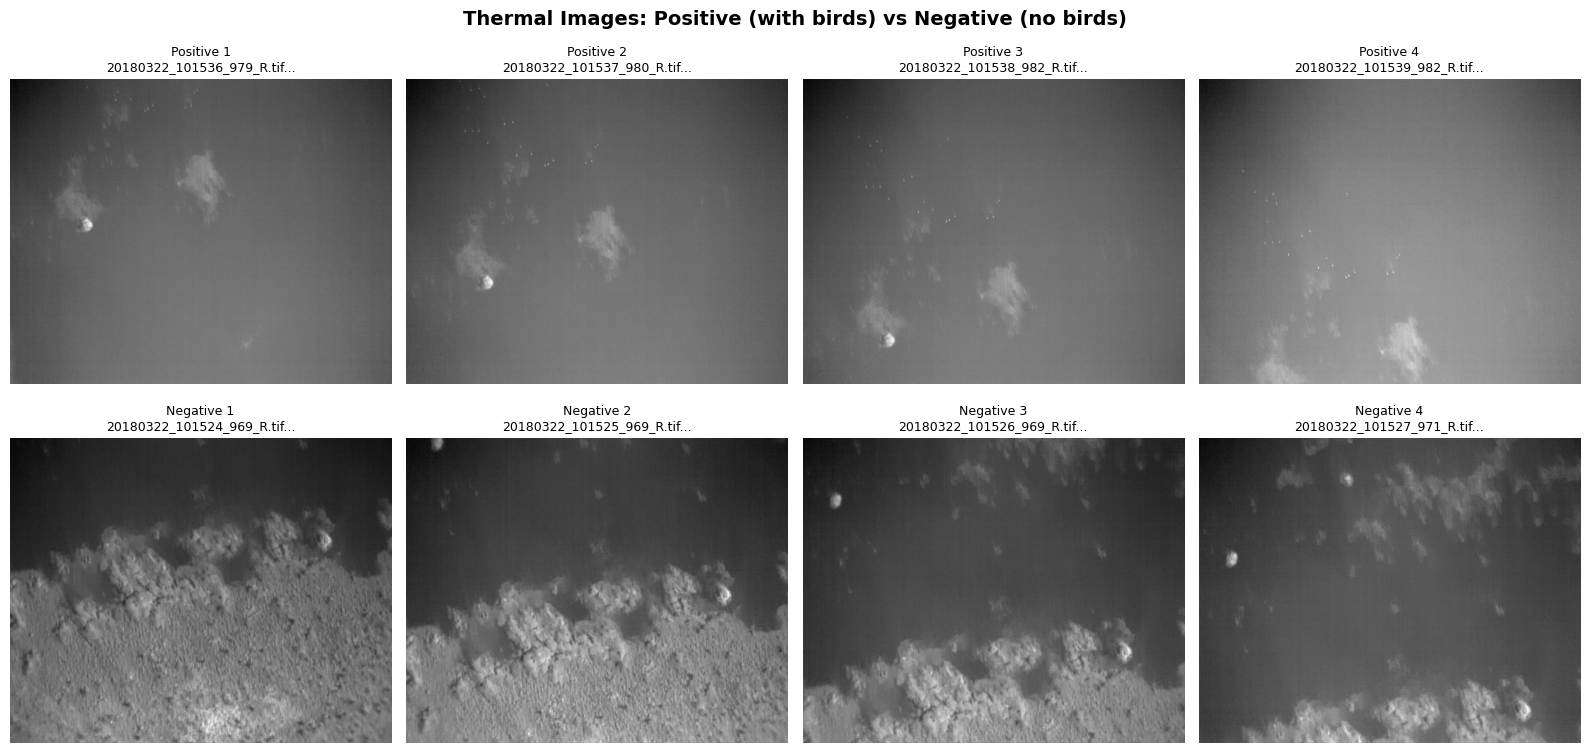


 Image specifications:
   Dimensions: 512 x 640 pixels
   Channels: 3
   Data type: uint8


In [ ]:
# ═══════════════════════════════════════════════════════
# DISPLAY SAMPLE THERMAL IMAGES
# ═══════════════════════════════════════════════════════
import cv2
import matplotlib.pyplot as plt
import os

# Set paths
positive_folder = '/content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)/01_Posistive Image'

negative_folder = '/content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)/03_Negative Images'

print("="*60)
print("THERMAL IMAGES PREVIEW")
print("="*60)

# Get image lists
positive_images = sorted([f for f in os.listdir(positive_folder)
                         if f.lower().endswith(('.jpg', '.png', '.jpeg', '.tif', '.tiff'))])
negative_images = sorted([f for f in os.listdir(negative_folder)
                         if f.lower().endswith(('.jpg', '.png', '.jpeg', '.tif', '.tiff'))])

print(f"\n Positive images (with birds): {len(positive_images)}")
print(f" Negative images (no birds): {len(negative_images)}")
print(f" Total: {len(positive_images) + len(negative_images)}")

# Display samples from both categories
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Top row: Positive images (with birds)
for i in range(4):
    if i < len(positive_images):
        img_path = os.path.join(positive_folder, positive_images[i])
        img = cv2.imread(img_path)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[0, i].imshow(img_rgb, cmap='hot')
            axes[0, i].set_title(f'Positive {i+1}\n{positive_images[i][:25]}...', fontsize=9)
            axes[0, i].axis('off')

# Bottom row: Negative images (without birds)
for i in range(4):
    if i < len(negative_images):
        img_path = os.path.join(negative_folder, negative_images[i])
        img = cv2.imread(img_path)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[1, i].imshow(img_rgb, cmap='hot')
            axes[1, i].set_title(f'Negative {i+1}\n{negative_images[i][:25]}...', fontsize=9)
            axes[1, i].axis('off')

plt.suptitle('Thermal Images: Positive (with birds) vs Negative (no birds)',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print image info
sample_img = cv2.imread(os.path.join(positive_folder, positive_images[0]))
print(f"\n Image specifications:")
print(f"   Dimensions: {sample_img.shape[0]} x {sample_img.shape[1]} pixels")
print(f"   Channels: {sample_img.shape[2]}")
print(f"   Data type: {sample_img.dtype}")

print("="*60)

In [ ]:
# ═══════════════════════════════════════════════════════
# FIND ANNOTATION FILES
# ═══════════════════════════════════════════════════════
import os

base_path = '/content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)'

print("="*60)
print("SEARCHING FOR ANNOTATIONS")
print("="*60)

# Search for annotation files
annotation_folders = []
annotation_files = []

for root, dirs, files in os.walk(base_path):
    # Look for common annotation keywords
    if any(keyword in root.lower() for keyword in ['annotation', 'label', 'ground', 'truth', 'bbox']):
        print(f"\n Found annotation folder: {os.path.basename(root)}")
        print(f"   Path: {root}")

        # List contents
        contents = os.listdir(root)[:10]
        print(f"   Contains {len(os.listdir(root))} files")
        print(f"   Sample files: {contents}")

        annotation_folders.append(root)

    # Also check for annotation file types
    for file in files:
        if file.lower().endswith(('.xml', '.txt', '.json', '.csv')):
            annotation_files.append(os.path.join(root, file))

# Show all subfolders in the main folder
print(f"\n All subfolders in main dataset folder:")
for item in os.listdir(base_path):
    item_path = os.path.join(base_path, item)
    if os.path.isdir(item_path):
        file_count = len(os.listdir(item_path))
        print(f"   {item}/ ({file_count} items)")

# Check if there are annotation files
if annotation_files:
    print(f"\n Found {len(annotation_files)} annotation files")

    # Group by extension
    extensions = {}
    for af in annotation_files:
        ext = os.path.splitext(af)[1].lower()
        extensions[ext] = extensions.get(ext, 0) + 1

    print("\n Annotation file types:")
    for ext, count in extensions.items():
        print(f"   {ext}: {count} files")

    # Show sample annotation
    if annotation_files:
        sample_ann = annotation_files[0]
        print(f"\n Sample annotation file: {os.path.basename(sample_ann)}")
        print("   Content preview:")
        print("   " + "-"*50)
        try:
            with open(sample_ann, 'r') as f:
                content = f.read(500)  # First 500 characters
                for line in content.split('\n')[:10]:
                    print(f"   {line}")
        except:
            print("   (Binary file or cannot read)")
else:
    print("\n No standard annotation files found")
    print("Checking folder structure more carefully...")

print("\n" + "="*60)

SEARCHING FOR ANNOTATIONS

 Found annotation folder: 01_Thermal Images and Ground Truth (used for detector training and testing)
   Path: /content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)
   Contains 3 files
   Sample files: ['01_Posistive Image', '02_Groundtruth Label for Positive Images', '03_Negative Images']

 Found annotation folder: 01_Posistive Image
   Path: /content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)/01_Posistive Image
   Contains 355 files
   Sample files: ['20180322_101906_089_R.tif', '20180322_101634_573_R.tif', '20180322_101718_981_R.tif', '20180322_101650_689_R.tif', '20180322_101639_579_R.tif', '20180322_101756_389_R.tif', '20180322_102126_464_R.tif', '20180322_102259_389_R.tif', '201

In [ ]:
# ═══════════════════════════════════════════════════════
# CHECK POSITIVE IMAGE FOLDER FOR ANNOTATIONS
# ═══════════════════════════════════════════════════════
import os

positive_folder = '/content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)/01_Posistive Image'

print("="*60)
print("CHECKING POSITIVE IMAGE FOLDER")
print("="*60)

# List ALL files in positive folder
all_files = os.listdir(positive_folder)
print(f"\n Total files in folder: {len(all_files)}")

# Group by file type
file_types = {}
for f in all_files:
    ext = os.path.splitext(f)[1].lower()
    file_types[ext] = file_types.get(ext, 0) + 1

print("\n File types present:")
for ext, count in sorted(file_types.items(), key=lambda x: x[1], reverse=True):
    print(f"   {ext if ext else '(no extension)'}: {count} files")

# Look for annotation files
annotation_exts = ['.xml', '.txt', '.json', '.csv']
annotations = [f for f in all_files if os.path.splitext(f)[1].lower() in annotation_exts]

if annotations:
    print(f"\n Found {len(annotations)} annotation files!")
    print(f"   Sample: {annotations[:5]}")

    # Read first annotation
    sample_ann_path = os.path.join(positive_folder, annotations[0])
    print(f"\n Sample annotation: {annotations[0]}")
    print("   " + "-"*50)
    with open(sample_ann_path, 'r') as f:
        content = f.read(800)
        print(content)
else:
    print("\n No annotation files in positive image folder")

# Check parent folder for annotation subfolder
parent_folder = os.path.dirname(positive_folder)
print(f"\n Contents of parent folder:")
for item in os.listdir(parent_folder):
    item_path = os.path.join(parent_folder, item)
    if os.path.isdir(item_path):
        count = len(os.listdir(item_path))
        print(f"    {item}/ ({count} items)")
    else:
        print(f"    {item}")

print("="*60)

CHECKING POSITIVE IMAGE FOLDER

 Total files in folder: 355

 File types present:
   .tif: 355 files

 No annotation files in positive image folder

 Contents of parent folder:
    01_Posistive Image/ (355 items)
    02_Groundtruth Label for Positive Images/ (1 items)
    03_Negative Images/ (187 items)


In [ ]:
# ═══════════════════════════════════════════════════════
# COMPREHENSIVE ANNOTATION SEARCH
# ═══════════════════════════════════════════════════════
import os

base = '/content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)'

print("="*60)
print("COMPLETE FOLDER STRUCTURE")
print("="*60)

for root, dirs, files in os.walk(base):
    level = root.replace(base, '').count(os.sep)
    indent = '  ' * level
    folder_name = os.path.basename(root) if level > 0 else 'Training Ground Truth'

    # Count different file types
    images = [f for f in files if f.lower().endswith(('.jpg', '.png', '.tif', '.tiff'))]
    annotations = [f for f in files if f.lower().endswith(('.xml', '.txt', '.json'))]

    if images or annotations:
        print(f'\n{indent} {folder_name}/')
        if images:
            print(f'{indent}     {len(images)} images')
        if annotations:
            print(f'{indent}    {len(annotations)} annotations')

            # Show annotation format
            if annotations:
                sample_path = os.path.join(root, annotations[0])
                ext = os.path.splitext(annotations[0])[1]
                print(f'{indent}   Format: {ext}')

                # Quick peek
                try:
                    with open(sample_path, 'r') as f:
                        first_line = f.readline().strip()
                        print(f'{indent}   Sample: {first_line[:60]}...')
                except:
                    pass

print("\n" + "="*60)

COMPLETE FOLDER STRUCTURE

   01_Posistive Image/
       355 images

   03_Negative Images/
       187 images



ANNOTATION DATA ANALYSIS

 Total bounding boxes: 8975
 Unique images with annotations: 355

 Sample annotations:
               imageFilename  x(column)  y(row)  width  height
0  20180322_101536_979_R.tif        127      11      7       7
1  20180322_101536_979_R.tif        174      32      7       7
2  20180322_101536_979_R.tif        178      19      7       7
3  20180322_101536_979_R.tif        199      31      7       7
4  20180322_101536_979_R.tif        223      51      7       7
5  20180322_101536_979_R.tif        228      48      7       7
6  20180322_101536_979_R.tif        236      42      7       7
7  20180322_101536_979_R.tif        291      46      7       7
8  20180322_101536_979_R.tif        310      16      7       7
9  20180322_101536_979_R.tif        301      42      7       7

 Bounding box statistics:
         x(column)       y(row)   width  height
count  8975.000000  8975.000000  8975.0  8975.0
mean    292.059721   250.338384     7.0     7.0
std     176.536051   14

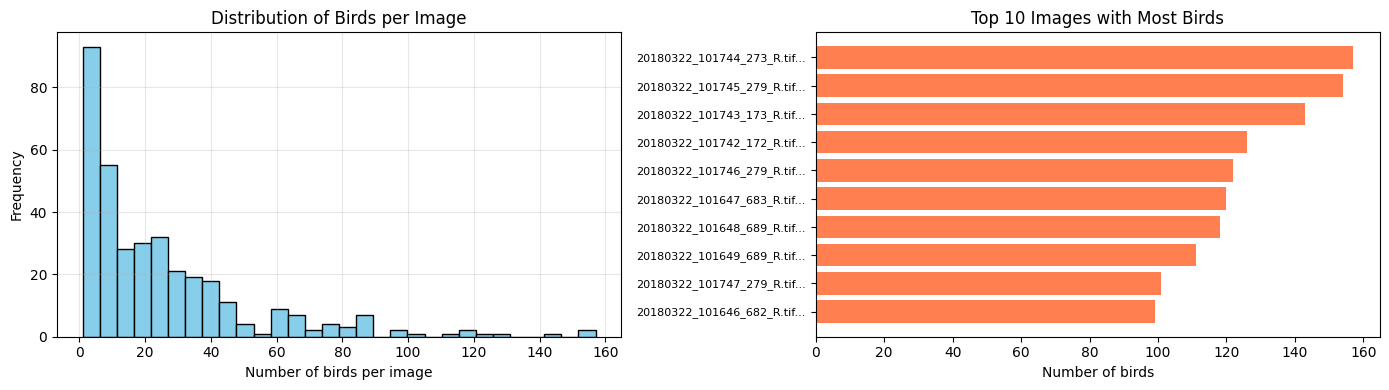


 Image coverage:
   Total positive images: 355
   Images with annotations: 355
   Images without annotations: 0


In [ ]:
# ═══════════════════════════════════════════════════════
# LOAD AND ANALYZE ANNOTATIONS
# ═══════════════════════════════════════════════════════
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
csv_path = '/content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)/02_Groundtruth Label for Positive Images/Bounding Box Label.csv'

df = pd.read_csv(csv_path)

print("="*60)
print("ANNOTATION DATA ANALYSIS")
print("="*60)

print(f"\n Total bounding boxes: {len(df)}")
print(f" Unique images with annotations: {df['imageFilename'].nunique()}")

# Show first few rows
print(f"\n Sample annotations:")
print(df.head(10))

# Statistics
print(f"\n Bounding box statistics:")
print(df[['x(column)', 'y(row)', 'width', 'height']].describe())

# Count birds per image
birds_per_image = df['imageFilename'].value_counts()
print(f"\n Birds per image:")
print(f"   Min: {birds_per_image.min()}")
print(f"   Max: {birds_per_image.max()}")
print(f"   Mean: {birds_per_image.mean():.2f}")
print(f"   Median: {birds_per_image.median():.0f}")

# Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Birds per image histogram
axes[0].hist(birds_per_image.values, bins=30, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Number of birds per image')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Birds per Image')
axes[0].grid(alpha=0.3)

# Top 10 images with most birds
top_10 = birds_per_image.head(10)
axes[1].barh(range(10), top_10.values, color='coral')
axes[1].set_yticks(range(10))
axes[1].set_yticklabels([name[:25]+'...' for name in top_10.index], fontsize=8)
axes[1].set_xlabel('Number of birds')
axes[1].set_title('Top 10 Images with Most Birds')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Check for images without annotations
positive_folder = '/content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)/01_Posistive Image'

import os
all_positive_images = set([f for f in os.listdir(positive_folder) if f.endswith('.tif')])
annotated_images = set(df['imageFilename'].unique())

print(f"\n Image coverage:")
print(f"   Total positive images: {len(all_positive_images)}")
print(f"   Images with annotations: {len(annotated_images)}")
print(f"   Images without annotations: {len(all_positive_images - annotated_images)}")

if len(all_positive_images - annotated_images) > 0:
    print(f"\n Some positive images don't have annotations:")
    missing = list(all_positive_images - annotated_images)[:5]
    for img in missing:
        print(f"      {img}")

print("="*60)

VISUALIZING ANNOTATIONS


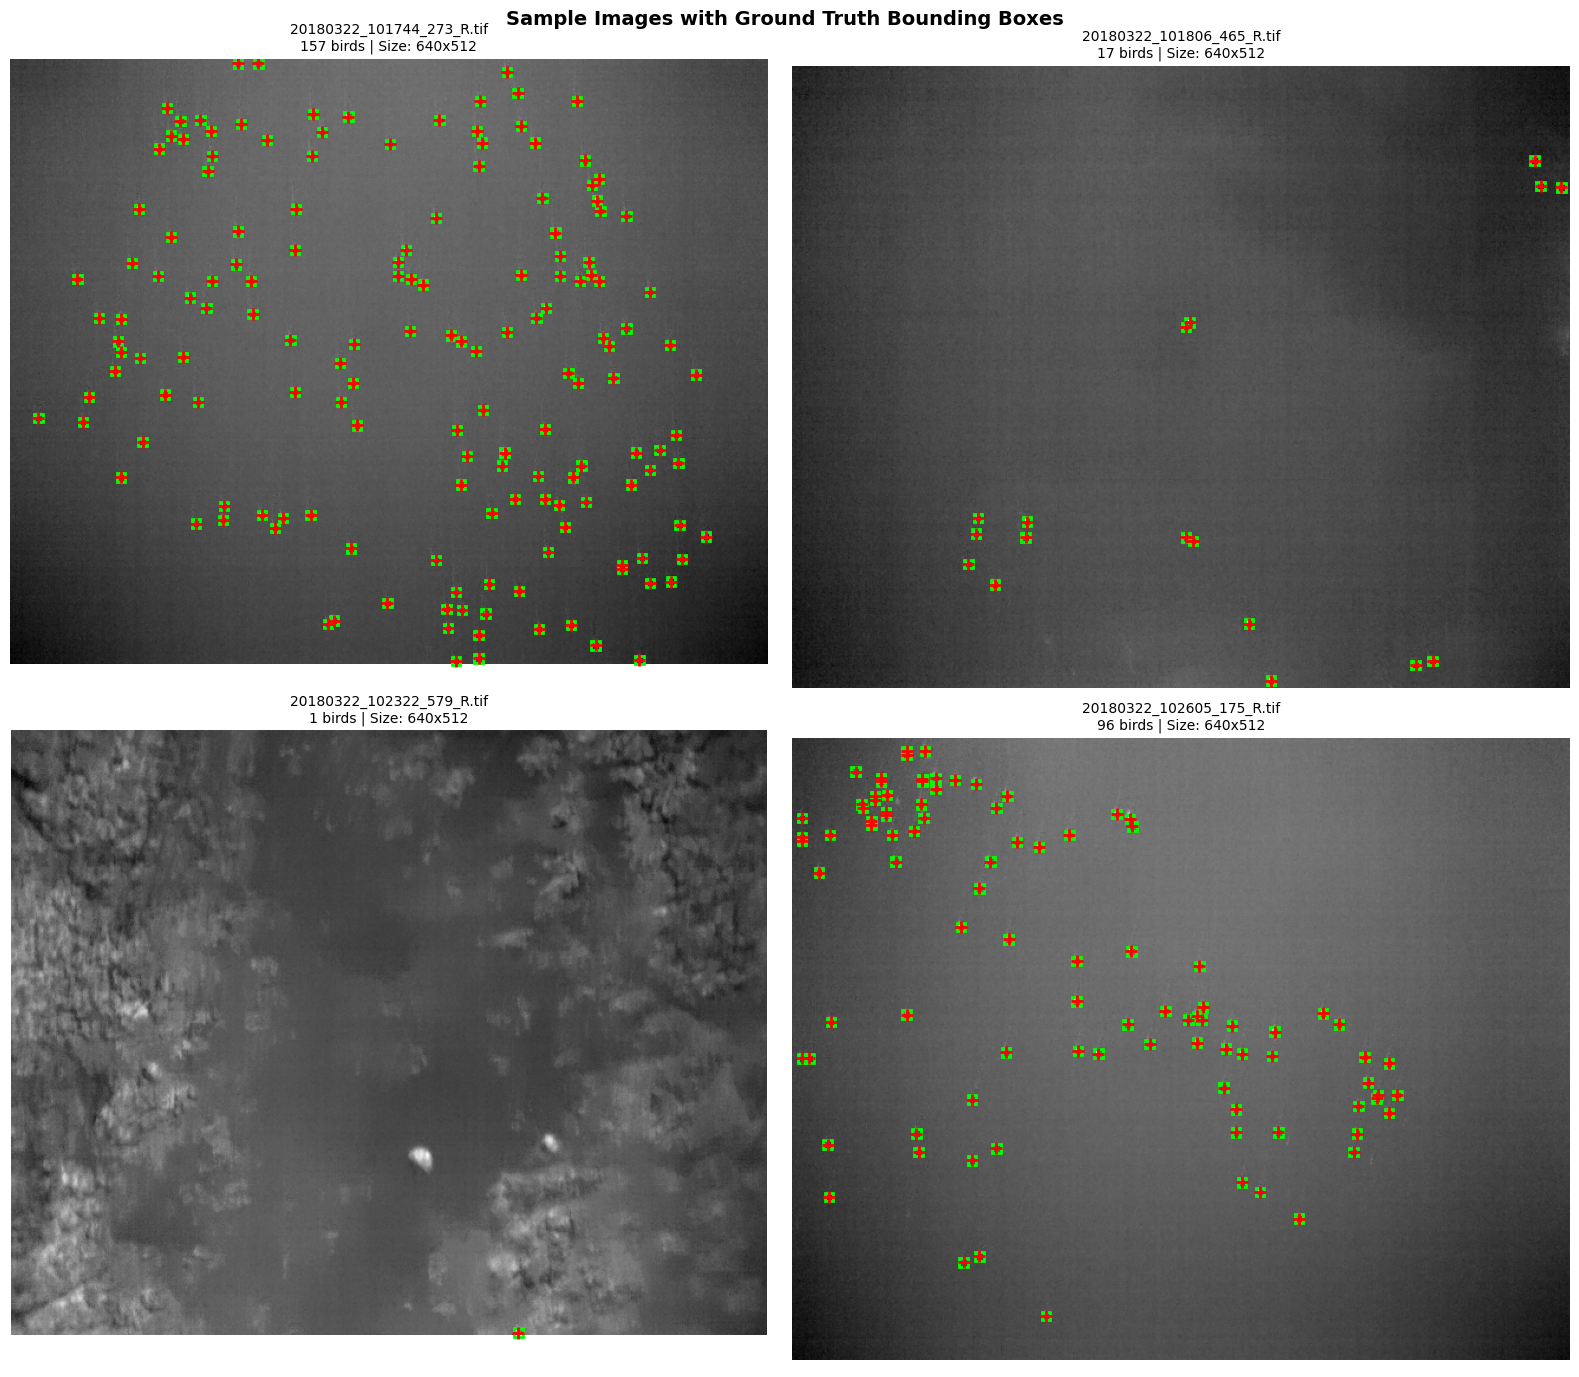


 Displayed 4 sample images
   Green boxes = ground truth bounding boxes
   Red crosses = bird centers


In [ ]:
# ═══════════════════════════════════════════════════════
# VISUALIZE IMAGES WITH ANNOTATIONS
# ═══════════════════════════════════════════════════════
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Paths
csv_path = '/content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)/02_Groundtruth Label for Positive Images/Bounding Box Label.csv'

positive_folder = '/content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)/01_Posistive Image'

# Load annotations
df = pd.read_csv(csv_path)

# Select images with different bird counts
birds_per_img = df['imageFilename'].value_counts()
sample_images = [
    birds_per_img.index[0],  # Most birds
    birds_per_img.index[len(birds_per_img)//2],  # Medium
    birds_per_img.index[-1],  # Fewest birds
    birds_per_img.index[10]  # Random sample
]

print("="*60)
print("VISUALIZING ANNOTATIONS")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, img_name in enumerate(sample_images):
    # Load image
    img_path = os.path.join(positive_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)  # Load as-is for .tif

    if img is None:
        print(f" Could not load: {img_name}")
        continue

    # Convert to RGB for display
    if len(img.shape) == 2:  # Grayscale
        img_display = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    else:
        img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Normalize for better visualization
    img_display = cv2.normalize(img_display, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Get annotations for this image
    img_annotations = df[df['imageFilename'] == img_name]

    # Display image
    axes[idx].imshow(img_display, cmap='hot')

    # Draw bounding boxes
    for _, row in img_annotations.iterrows():
        x = row['x(column)']
        y = row['y(row)']
        w = row['width']
        h = row['height']

        # Create rectangle
        rect = patches.Rectangle((x, y), w, h,
                                linewidth=2,
                                edgecolor='lime',
                                facecolor='none')
        axes[idx].add_patch(rect)

        # Add small dot at center
        axes[idx].plot(x + w/2, y + h/2, 'r+', markersize=8, markeredgewidth=2)

    axes[idx].set_title(f'{img_name}\n{len(img_annotations)} birds | Size: {img.shape[1]}x{img.shape[0]}',
                       fontsize=10)
    axes[idx].axis('off')

plt.suptitle('Sample Images with Ground Truth Bounding Boxes',
            fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n Displayed {len(sample_images)} sample images")
print("   Green boxes = ground truth bounding boxes")
print("   Red crosses = bird centers")

print("="*60)

In [ ]:
# ═══════════════════════════════════════════════════════
# CONVERT CSV TO YOLO FORMAT
# ═══════════════════════════════════════════════════════
import pandas as pd
import os
import cv2
from tqdm import tqdm

print("="*60)
print("CONVERTING ANNOTATIONS TO YOLO FORMAT")
print("="*60)

# Paths
csv_path = '/content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)/02_Groundtruth Label for Positive Images/Bounding Box Label.csv'

positive_folder = '/content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)/01_Posistive Image'

# Load annotations
df = pd.read_csv(csv_path)

# Get unique images
unique_images = df['imageFilename'].unique()

print(f"\n Converting {len(unique_images)} images to YOLO format...")

# Create output folder for YOLO labels
yolo_labels_folder = '/content/waterfowl_yolo_labels'
os.makedirs(yolo_labels_folder, exist_ok=True)

conversion_stats = {'success': 0, 'failed': 0, 'total_boxes': 0}

for img_name in tqdm(unique_images, desc="Converting"):
    # Get image dimensions
    img_path = os.path.join(positive_folder, img_name)

    try:
        img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
        if img is None:
            conversion_stats['failed'] += 1
            continue

        img_height, img_width = img.shape[:2]

        # Get all annotations for this image
        img_annotations = df[df['imageFilename'] == img_name]

        # Create YOLO format label file
        label_filename = img_name.replace('.tif', '.txt')
        label_path = os.path.join(yolo_labels_folder, label_filename)

        yolo_lines = []
        for _, row in img_annotations.iterrows():
            # Get bbox coordinates (top-left corner format)
            x = row['x(column)']
            y = row['y(row)']
            w = row['width']
            h = row['height']

            # Convert to YOLO format (center coordinates, normalized)
            x_center = (x + w / 2) / img_width
            y_center = (y + h / 2) / img_height
            width_norm = w / img_width
            height_norm = h / img_height

            # Class 0 = waterfowl (single class)
            yolo_line = f"0 {x_center:.6f} {y_center:.6f} {width_norm:.6f} {height_norm:.6f}\n"
            yolo_lines.append(yolo_line)
            conversion_stats['total_boxes'] += 1

        # Write to file
        with open(label_path, 'w') as f:
            f.writelines(yolo_lines)

        conversion_stats['success'] += 1

    except Exception as e:
        print(f"\n Error processing {img_name}: {e}")
        conversion_stats['failed'] += 1

print(f"\n CONVERSION COMPLETE!")
print(f"   Successfully converted: {conversion_stats['success']} images")
print(f"   Failed: {conversion_stats['failed']} images")
print(f"   Total bounding boxes: {conversion_stats['total_boxes']}")
print(f"   Labels saved to: {yolo_labels_folder}")

# Show sample YOLO label
sample_label = os.path.join(yolo_labels_folder, os.listdir(yolo_labels_folder)[0])
print(f"\n Sample YOLO label file:")
print(f"   File: {os.path.basename(sample_label)}")
print("   Content:")
with open(sample_label, 'r') as f:
    for i, line in enumerate(f.readlines()[:5]):
        print(f"      {line.strip()}")
    if len(open(sample_label).readlines()) > 5:
        print(f"      ... and {len(open(sample_label).readlines())-5} more boxes")

print("="*60)

CONVERTING ANNOTATIONS TO YOLO FORMAT

 Converting 355 images to YOLO format...


Converting: 100%|██████████| 355/355 [00:02<00:00, 118.52it/s]


 CONVERSION COMPLETE!
   Successfully converted: 355 images
   Failed: 0 images
   Total bounding boxes: 8975
   Labels saved to: /content/waterfowl_yolo_labels

 Sample YOLO label file:
   File: 20180322_102621_360_R.txt
   Content:
      0 0.383594 0.104492 0.010937 0.013672
      0 0.403906 0.098633 0.010937 0.013672
      0 0.405469 0.094727 0.010937 0.013672
      0 0.636719 0.020508 0.010937 0.013672
      0 0.794531 0.204102 0.010937 0.013672
      ... and 8 more boxes


In [ ]:
# ═══════════════════════════════════════════════════════
# ORGANIZE DATASET FOR YOLO TRAINING
# ═══════════════════════════════════════════════════════
import os
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm

print("="*60)
print("ORGANIZING DATASET FOR YOLO")
print("="*60)

# Source folders
positive_images = '/content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)/01_Posistive Image'

negative_images = '/content/waterfowl_dataset/00_UAV-derived Thermal Waterfowl Dataset/00_UAV-derived Waterfowl Thermal Imagery Dataset/01_Thermal Images and Ground Truth (used for detector training and testing)/03_Negative Images'

yolo_labels = '/content/waterfowl_yolo_labels'

# Create YOLO dataset structure
yolo_dataset = '/content/waterfowl_yolo_dataset'

for split in ['train', 'val', 'test']:
    os.makedirs(f'{yolo_dataset}/images/{split}', exist_ok=True)
    os.makedirs(f'{yolo_dataset}/labels/{split}', exist_ok=True)

print(f"\n Created folder structure at: {yolo_dataset}")

# Get all annotated images (positive images with labels)
annotated_images = [f.replace('.txt', '.tif') for f in os.listdir(yolo_labels)]
all_negative_images = [f for f in os.listdir(negative_images) if f.endswith('.tif')]

print(f"\n Dataset composition:")
print(f"   Positive images (with birds): {len(annotated_images)}")
print(f"   Negative images (no birds): {len(all_negative_images)}")
print(f"   Total: {len(annotated_images) + len(all_negative_images)}")

# Split positive images: 70% train, 15% val, 15% test
train_pos, temp_pos = train_test_split(annotated_images, test_size=0.3, random_state=42)
val_pos, test_pos = train_test_split(temp_pos, test_size=0.5, random_state=42)

# Split negative images similarly
train_neg, temp_neg = train_test_split(all_negative_images, test_size=0.3, random_state=42)
val_neg, test_neg = train_test_split(temp_neg, test_size=0.5, random_state=42)

print(f"\n Dataset split:")
print(f"   Train: {len(train_pos)} positive + {len(train_neg)} negative = {len(train_pos)+len(train_neg)}")
print(f"   Val:   {len(val_pos)} positive + {len(val_neg)} negative = {len(val_pos)+len(val_neg)}")
print(f"   Test:  {len(test_pos)} positive + {len(test_neg)} negative = {len(test_pos)+len(test_neg)}")

# Function to copy files
def copy_dataset_files(image_list, split, source_folder, has_labels=True):
    """Copy images and labels to the appropriate split folder"""
    for img_name in tqdm(image_list, desc=f"Copying {split}"):
        # Copy image
        src_img = os.path.join(source_folder, img_name)
        dst_img = f'{yolo_dataset}/images/{split}/{img_name}'
        shutil.copy(src_img, dst_img)

        # Copy label (if exists)
        if has_labels:
            label_name = img_name.replace('.tif', '.txt')
            src_label = os.path.join(yolo_labels, label_name)
            dst_label = f'{yolo_dataset}/labels/{split}/{label_name}'

            if os.path.exists(src_label):
                shutil.copy(src_label, dst_label)
        else:
            # Create empty label file for negative images
            label_name = img_name.replace('.tif', '.txt')
            dst_label = f'{yolo_dataset}/labels/{split}/{label_name}'
            open(dst_label, 'w').close()  # Create empty file

print(f"\n Copying files...")

# Copy positive images (with labels)
copy_dataset_files(train_pos, 'train', positive_images, has_labels=True)
copy_dataset_files(val_pos, 'val', positive_images, has_labels=True)
copy_dataset_files(test_pos, 'test', positive_images, has_labels=True)

# Copy negative images (empty labels)
copy_dataset_files(train_neg, 'train', negative_images, has_labels=False)
copy_dataset_files(val_neg, 'val', negative_images, has_labels=False)
copy_dataset_files(test_neg, 'test', negative_images, has_labels=False)

print(f"\n DATASET ORGANIZATION COMPLETE!")
print(f"\n Final structure:")
for split in ['train', 'val', 'test']:
    img_count = len(os.listdir(f'{yolo_dataset}/images/{split}'))
    lbl_count = len(os.listdir(f'{yolo_dataset}/labels/{split}'))
    print(f"   {split:5s}: {img_count} images, {lbl_count} labels")

print("="*60)

ORGANIZING DATASET FOR YOLO

 Created folder structure at: /content/waterfowl_yolo_dataset

 Dataset composition:
   Positive images (with birds): 355
   Negative images (no birds): 187
   Total: 542

 Dataset split:
   Train: 248 positive + 130 negative = 378
   Val:   53 positive + 28 negative = 81
   Test:  54 positive + 29 negative = 83

 Copying files...


Copying test: 100%|██████████| 29/29 [00:00<00:00, 225.16it/s]


 DATASET ORGANIZATION COMPLETE!

 Final structure:
   train: 378 images, 378 labels
   val  : 81 images, 81 labels
   test : 83 images, 83 labels


In [ ]:
# ═══════════════════════════════════════════════════════
# CREATE YOLO CONFIGURATION FILE
# ═══════════════════════════════════════════════════════

yaml_content = f"""# Waterfowl Thermal Detection Dataset
# Dataset for UAV-based waterfowl detection in thermal imagery

path: /content/waterfowl_yolo_dataset  # Dataset root directory
train: images/train  # Train images (relative to 'path')
val: images/val      # Validation images (relative to 'path')
test: images/test    # Test images (relative to 'path')

# Classes
nc: 1  # Number of classes
names:
  0: waterfowl  # Class names
"""

yaml_path = '/content/waterfowl_yolo_dataset/data.yaml'

with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print("="*60)
print("CONFIGURATION FILE CREATED")
print("="*60)
print(f"\n File: {yaml_path}")
print("\nContent:")
print("-"*60)
print(yaml_content)
print("-"*60)
print("\n Dataset is ready for training!")
print("="*60)

CONFIGURATION FILE CREATED

 File: /content/waterfowl_yolo_dataset/data.yaml

Content:
------------------------------------------------------------
# Waterfowl Thermal Detection Dataset
# Dataset for UAV-based waterfowl detection in thermal imagery

path: /content/waterfowl_yolo_dataset  # Dataset root directory
train: images/train  # Train images (relative to 'path')
val: images/val      # Validation images (relative to 'path')
test: images/test    # Test images (relative to 'path')

# Classes
nc: 1  # Number of classes
names:
  0: waterfowl  # Class names

------------------------------------------------------------

 Dataset is ready for training!


In [ ]:
# ═══════════════════════════════════════════════════════
# SETUP: Import and verify YOLOv8
# ═══════════════════════════════════════════════════════
from ultralytics import YOLO
import torch
import os

print("="*60)
print("YOLO TRAINING SETUP")
print("="*60)

# Check GPU
print(f"\n  GPU Status:")
print(f"   Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"   Device: {torch.cuda.get_device_name(0)}")
    print(f"   Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("    No GPU - training will be SLOW!")

# Verify dataset
dataset_path = '/content/waterfowl_yolo_dataset'
print(f"\n Dataset verification:")
for split in ['train', 'val', 'test']:
    img_count = len(os.listdir(f'{dataset_path}/images/{split}'))
    print(f"   {split:5s}: {img_count} images")

print(f"\n Ready to train!")
print("="*60)

YOLO TRAINING SETUP

  GPU Status:
   Available: True
   Device: Tesla T4
   Memory: 15.83 GB

 Dataset verification:
   train: 378 images
   val  : 81 images
   test : 83 images

 Ready to train!


In [ ]:
# ═══════════════════════════════════════════════════════
# TRAINING CONFIGURATION
# ═══════════════════════════════════════════════════════

print("="*60)
print("TRAINING PARAMETERS")
print("="*60)

# Training hyperparameters
config = {
    'model': 'yolov8n.pt',        # Nano model (fastest, good for small objects)
    'epochs': 100,                 # Number of training epochs
    'imgsz': 640,                  # Image size (640x640)
    'batch': 16,                   # Batch size (adjust based on GPU memory)
    'patience': 20,                # Early stopping patience
    'save': True,                  # Save checkpoints
    'project': 'waterfowl_detection',  # Project name
    'name': 'thermal_yolov8n',     # Experiment name
    'exist_ok': True,              # Overwrite existing
    'pretrained': True,            # Use pretrained weights
    'optimizer': 'Adam',           # Optimizer
    'lr0': 0.001,                  # Initial learning rate
    'weight_decay': 0.0005,        # Weight decay
    'augment': True,               # Use data augmentation
    'mosaic': 1.0,                 # Mosaic augmentation
    'hsv_h': 0.015,                # HSV-Hue augmentation
    'hsv_s': 0.7,                  # HSV-Saturation augmentation
    'hsv_v': 0.4,                  # HSV-Value augmentation
    'degrees': 10.0,               # Rotation augmentation
    'translate': 0.1,              # Translation augmentation
    'scale': 0.5,                  # Scale augmentation
    'flipud': 0.5,                 # Vertical flip probability
    'fliplr': 0.5,                 # Horizontal flip probability
}

print("\n Training Configuration:")
for key, value in config.items():
    print(f"   {key:15s}: {value}")

# print("\n Notes:")
# print("   - YOLOv8n is the fastest, best for small objects (7x7 pixel birds)")
# print("   - 640x640 is standard YOLO input size")
# print("   - Data augmentation enabled (important for small dataset)")
# print("   - Early stopping will prevent overfitting")

print("="*60)

TRAINING PARAMETERS

 Training Configuration:
   model          : yolov8n.pt
   epochs         : 100
   imgsz          : 640
   batch          : 16
   patience       : 20
   save           : True
   project        : waterfowl_detection
   name           : thermal_yolov8n
   exist_ok       : True
   pretrained     : True
   optimizer      : Adam
   lr0            : 0.001
   weight_decay   : 0.0005
   augment        : True
   mosaic         : 1.0
   hsv_h          : 0.015
   hsv_s          : 0.7
   hsv_v          : 0.4
   degrees        : 10.0
   translate      : 0.1
   scale          : 0.5
   flipud         : 0.5
   fliplr         : 0.5

 Notes:
   - YOLOv8n is the fastest, best for small objects (7x7 pixel birds)
   - 640x640 is standard YOLO input size
   - Data augmentation enabled (important for small dataset)
   - Early stopping will prevent overfitting


In [ ]:
# ═══════════════════════════════════════════════════════
# FIX: CONVERT GRAYSCALE IMAGES TO RGB
# ═══════════════════════════════════════════════════════
import cv2
import os
from tqdm import tqdm

print("="*60)
print("CONVERTING THERMAL IMAGES TO RGB FORMAT")
print("="*60)

dataset_path = '/content/waterfowl_yolo_dataset'

# Function to convert images to 3-channel
def convert_to_rgb(image_folder):
    """Convert all grayscale images in folder to RGB (3-channel)"""
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.tif')]

    converted = 0
    for img_name in tqdm(image_files, desc=f"Converting {os.path.basename(image_folder)}"):
        img_path = os.path.join(image_folder, img_name)

        # Read image
        img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

        if img is None:
            print(f" Could not read: {img_name}")
            continue

        # Check if grayscale (2D array or 1 channel)
        if len(img.shape) == 2:  # Grayscale
            # Convert grayscale to RGB (replicate channel 3 times)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

            # Save as RGB
            cv2.imwrite(img_path, img_rgb)
            converted += 1
        elif img.shape[2] == 1:  # Single channel
            img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            cv2.imwrite(img_path, img_rgb)
            converted += 1

    return converted

# Convert all splits
print("\n Converting images in all splits...")
total_converted = 0

for split in ['train', 'val', 'test']:
    folder = f'{dataset_path}/images/{split}'
    print(f"\n Processing {split} set...")
    converted = convert_to_rgb(folder)
    total_converted += converted
    print(f"    Converted {converted} images")

print(f"\n CONVERSION COMPLETE!")
print(f"   Total images converted: {total_converted}")

# Verify a sample image
sample_folder = f'{dataset_path}/images/train'
sample_images = os.listdir(sample_folder)
if sample_images:
    sample_path = os.path.join(sample_folder, sample_images[0])
    sample_img = cv2.imread(sample_path)
    print(f"\n Sample image verification:")
    print(f"   File: {sample_images[0]}")
    print(f"   Shape: {sample_img.shape}")
    print(f"   Channels: {sample_img.shape[2]}")

    if sample_img.shape[2] == 3:
        print(f"  Image is now RGB (3 channels)")
    else:
        print(f"   Image still has {sample_img.shape[2]} channel(s)")

print("="*60)

CONVERTING THERMAL IMAGES TO RGB FORMAT

 Converting images in all splits...

 Processing train set...


Converting train: 100%|██████████| 378/378 [00:07<00:00, 50.51it/s]


    Converted 378 images

 Processing val set...


Converting val: 100%|██████████| 81/81 [00:01<00:00, 67.63it/s]


    Converted 81 images

 Processing test set...


Converting test: 100%|██████████| 83/83 [00:01<00:00, 66.82it/s]

    Converted 83 images

 CONVERSION COMPLETE!
   Total images converted: 542

 Sample image verification:
   File: 20180322_101634_573_R.tif
   Shape: (512, 640, 3)
   Channels: 3
  Image is now RGB (3 channels)


In [ ]:
# ═══════════════════════════════════════════════════════
# TRAIN YOLOv8 MODEL
# ═══════════════════════════════════════════════════════
from ultralytics import YOLO
import time
import torch

print("="*60)
print("STARTING YOLO TRAINING")
print("="*60)

# Check GPU
gpu_available = torch.cuda.is_available()
print(f"\n  GPU Status:")
print(f"   Available: {gpu_available}")
if gpu_available:
    print(f"   Device: {torch.cuda.get_device_name(0)}")
    print(f"   Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

# Load model
print("\n Loading YOLOv8n (nano) model...")
model = YOLO('yolov8n.pt')
print(" Model loaded!")

# Dataset
data_yaml = '/content/waterfowl_yolo_dataset/data.yaml'
print(f"\n Dataset: {data_yaml}")
print(f"   Train: 378 images")
print(f"   Val:   81 images")
print(f"   Test:  83 images")

print(f"\n Starting training...")
print(f"   Epochs: 100 (with early stopping)")
print(f"   Batch size: 16")
print(f"   Image size: 640x640")
print(f"   Expected time: 15-30 minutes on GPU")
print("\n" + "-"*60 + "\n")

# Start timer
start_time = time.time()

# TRAIN!
try:
    results = model.train(
        data=data_yaml,
        epochs=100,
        imgsz=640,
        batch=16,
        patience=20,              # Stop early if no improvement
        save=True,
        project='waterfowl_detection',
        name='thermal_yolov8n_final',
        exist_ok=True,
        pretrained=True,
        optimizer='Adam',
        lr0=0.001,
        verbose=True,
        plots=True,
        # Augmentation for small objects
        hsv_h=0.015,
        hsv_s=0.7,
        hsv_v=0.4,
        degrees=10.0,
        translate=0.1,
        scale=0.5,
        flipud=0.5,
        fliplr=0.5,
        mosaic=1.0,
        mixup=0.0,
        copy_paste=0.0,
    )

    # Calculate time
    training_time = time.time() - start_time
    hours = int(training_time // 3600)
    minutes = int((training_time % 3600) // 60)
    seconds = int(training_time % 60)

    print("\n" + "="*60)
    print(" TRAINING COMPLETE!")
    print("="*60)
    print(f"\n  Total time: {hours}h {minutes}m {seconds}s")
    print(f"\n Results location:")
    print(f"   waterfowl_detection/thermal_yolov8n_final/")
    print(f"\n Key files:")
    print(f"    weights/best.pt   - Best model (use this!)")
    print(f"    weights/last.pt   - Last epoch model")
    print(f"    results.png       - Training curves")
    print(f"    confusion_matrix.png")
    print(f"    val_batch predictions")

    # Show final metrics
    print(f"\n Final Validation Metrics:")
    print(f"   These will be in the results.csv file")

    print("\n" + "="*60)

except RuntimeError as e:
    if "out of memory" in str(e):
        print("\n GPU OUT OF MEMORY!")
        print("\n Solutions:")
        print("   1. Reduce batch size to 8 or 4")
        print("   2. Reduce image size to 512")
        print("   3. Use CPU (slower but works)")
        print("\n   Run the 'Smaller Batch' cell below...")
    else:
        print(f"\n Error: {e}")
        import traceback
        traceback.print_exc()

except Exception as e:
    print(f"\n Unexpected error: {e}")
    import traceback
    traceback.print_exc()

STARTING YOLO TRAINING

  GPU Status:
   Available: True
   Device: Tesla T4
   Memory: 15.83 GB

 Loading YOLOv8n (nano) model...
 Model loaded!

 Dataset: /content/waterfowl_yolo_dataset/data.yaml
   Train: 378 images
   Val:   81 images
   Test:  83 images

 Starting training...
   Epochs: 100 (with early stopping)
   Batch size: 16
   Image size: 640x640
   Expected time: 15-30 minutes on GPU

------------------------------------------------------------

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/waterfowl_yolo_dataset/data.yaml, degrees=10.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_

TRAINING RESULTS SUMMARY

 FINAL METRICS (Best Epoch):
   Precision:     0.8539
   Recall:        0.8323
   mAP@50:        0.8938
   mAP@50-95:     0.4412

 Interpretation:
    EXCELLENT! Your model is highly accurate!

 Displaying training curves...


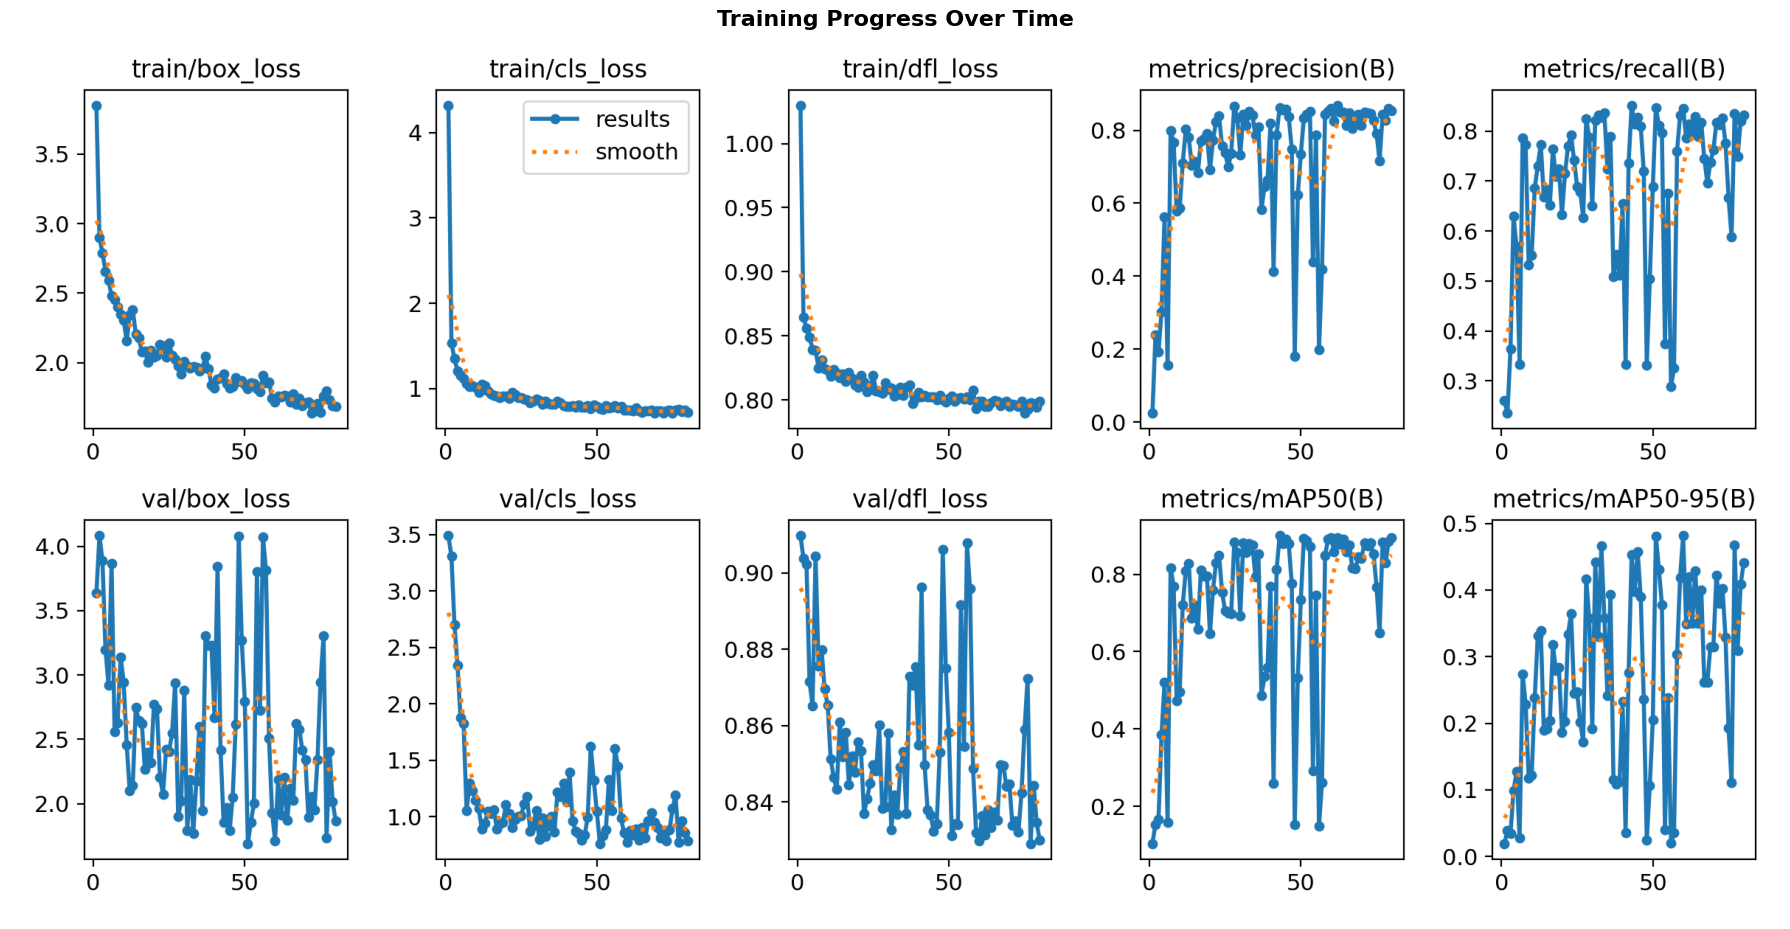


 Generating Custom Validation Plots (Green Box / Red Cross)...
   Generating custom plots for 8 random images...


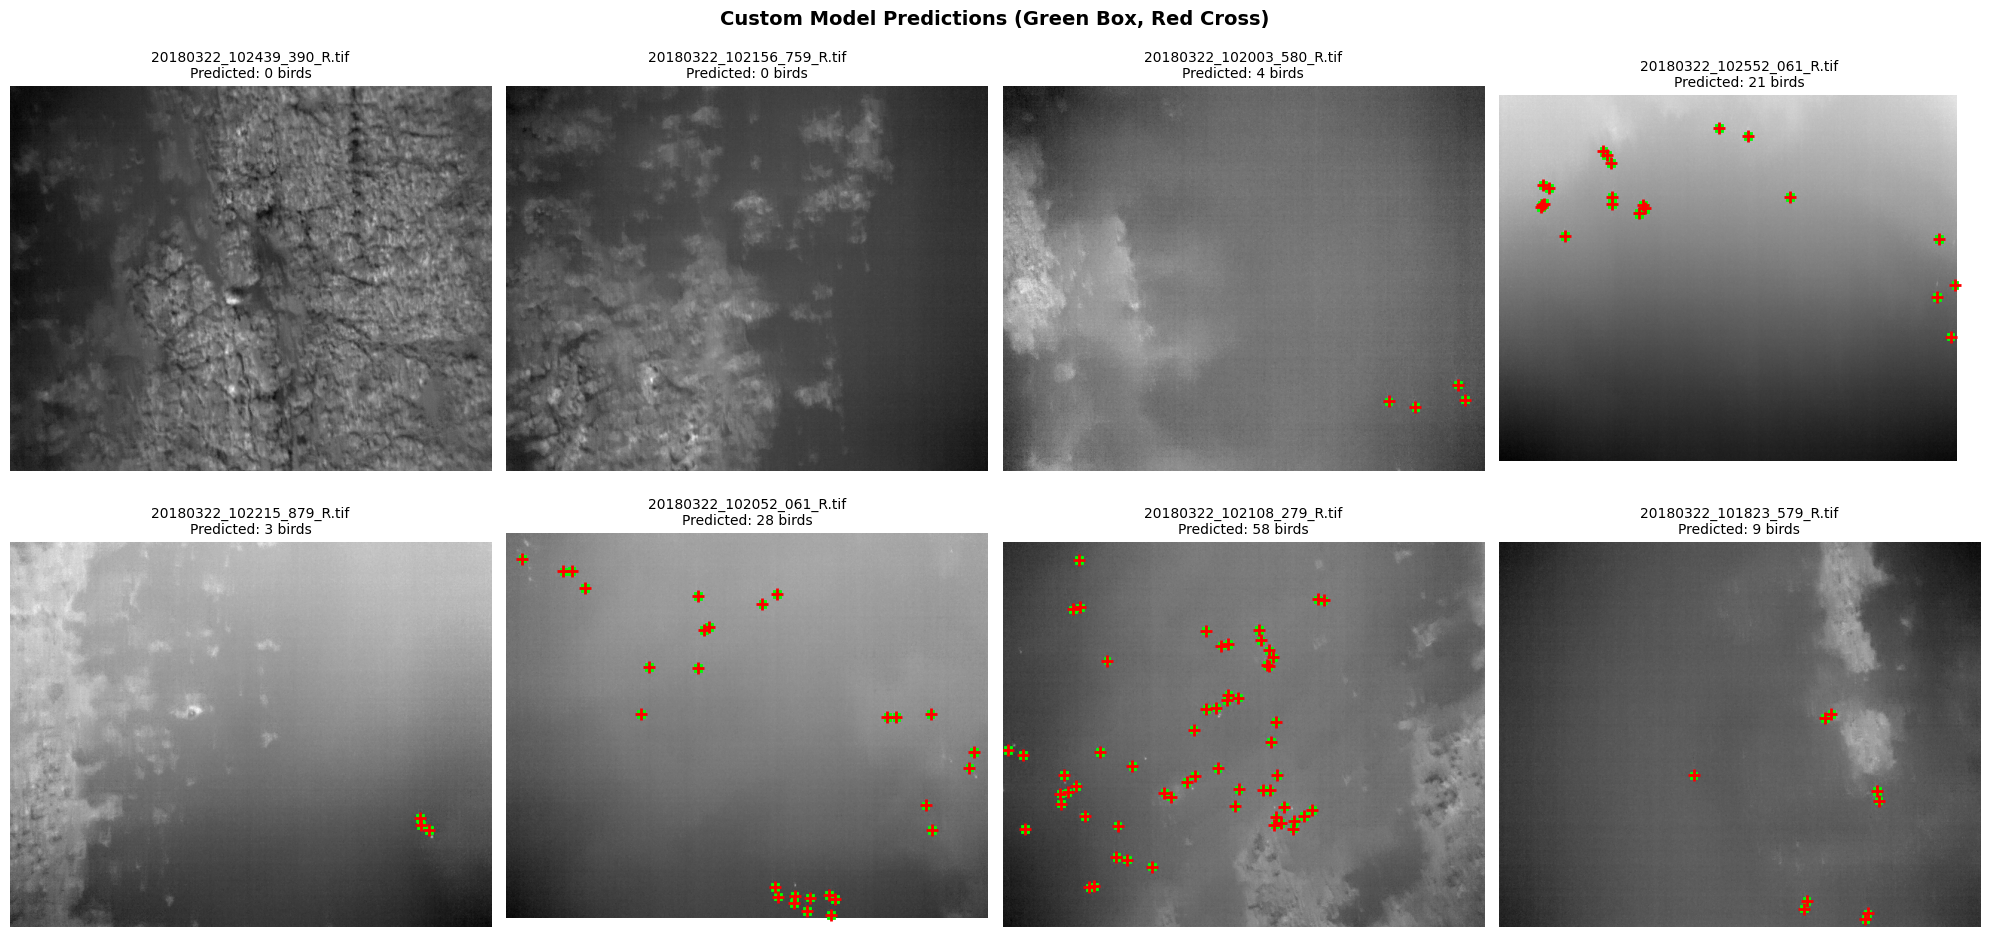


 Model trained successfully!
 All results in: waterfowl_detection/thermal_yolov8n_final


In [ ]:
# ═══════════════════════════════════════════════════════
# RESULTS SUMMARY & CUSTOM VALIDATION
# ═══════════════════════════════════════════════════════
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import os
import cv2
import random
from ultralytics import YOLO

# --- Configuration ---
results_dir = 'waterfowl_detection/thermal_yolov8n_final'

# --- Paths needed for custom plot ---
best_model_path = f'{results_dir}/weights/best.pt'

# ! IMPORTANT: You must set this to your validation images folder
val_images_dir = '/content/waterfowl_yolo_dataset/images/val'


print("="*60)
print("TRAINING RESULTS SUMMARY")
print("="*60)

# Check results
if os.path.exists(results_dir):

    # ══════════════════════════════════
    # Part 1: Show Metrics from CSV
    # ══════════════════════════════════
    csv_path = f'{results_dir}/results.csv'
    if os.path.exists(csv_path):
        try:
            df = pd.read_csv(csv_path)
            df.columns = df.columns.str.strip()  # Remove whitespace

            # Get final metrics
            final_row = df.iloc[-1]

            print(f"\n FINAL METRICS (Best Epoch):")
            print(f"   Precision:     {final_row['metrics/precision(B)']:.4f}")
            print(f"   Recall:        {final_row['metrics/recall(B)']:.4f}")
            print(f"   mAP@50:        {final_row['metrics/mAP50(B)']:.4f}")
            print(f"   mAP@50-95:     {final_row['metrics/mAP50-95(B)']:.4f}")

            print(f"\n Interpretation:")
            mAP50 = final_row['metrics/mAP50(B)']
            if mAP50 > 0.7:
                print(f"    EXCELLENT! Your model is highly accurate!")
            elif mAP50 > 0.5:
                print(f"    GOOD! Your model performs well!")
            elif mAP50 > 0.3:
                print(f"    MODERATE - Room for improvement")
            else:
                print(f"    NEEDS WORK - Consider more training or data")
        except Exception as e:
            print(f"\n ERROR: Could not read 'results.csv': {e}")
    else:
        print(f"\n WARNING: 'results.csv' not found. Cannot display metrics.")


    # ══════════════════════════════════
    # Part 2: Display Training Curves
    # ══════════════════════════════════
    results_img = f'{results_dir}/results.png'
    if os.path.exists(results_img):
        print(f"\n Displaying training curves...")
        try:
            img = mpimg.imread(results_img)
            fig, ax = plt.subplots(figsize=(18, 10))
            ax.imshow(img)
            ax.axis('off')
            plt.title('Training Progress Over Time', fontsize=16, fontweight='bold')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"\n ERROR: Could not display 'results.png': {e}")
    else:
        print(f"\n WARNING: 'results.png' not found. Cannot display training curves.")


    # ═════════════════════════════════════════════════
    # Part 3: Show Custom "Green Box, Red Cross" Plots
    # (Updated to display 10 images in a 3x4 grid)
    # ═════════════════════════════════════════════════
    print(f"\n Generating Custom Validation Plots (Green Box / Red Cross)...")

    # Check if model and image paths are valid
    if not os.path.exists(best_model_path):
        print(f"   ERROR: Model not found at {best_model_path}. Skipping custom plots.")
    elif not os.path.exists(val_images_dir):
        print(f"   ERROR: Validation images dir not found at {val_images_dir}. Skipping custom plots.")
    else:
        try:
            # --- Load Model and Select Images ---
            model = YOLO(best_model_path)
            val_images = [f for f in os.listdir(val_images_dir) if f.endswith(('.tif', '.png', '.jpg', '.jpeg'))]

            if not val_images:
                print(f"   ERROR: No images found in {val_images_dir}. Skipping.")
            else:
                # Select 8 random images, or fewer if not enough are available
                num_plots = 8
                sample_images = random.sample(val_images, min(num_plots, len(val_images)))

                # Determine grid size for up to 8 images (e.g., 3 rows x 4 columns = 12 spots)
                num_cols = 4
                num_rows = (len(sample_images) + num_cols - 1) // num_cols # Ceiling division

                fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
                axes = axes.ravel() # Flatten the grid for easy iteration

                print(f"   Generating custom plots for {len(sample_images)} random images...")

                for idx, img_name in enumerate(sample_images):
                    img_path = os.path.join(val_images_dir, img_name)

                    # 1. Run prediction using the best model
                    results = model.predict(img_path, conf=0.25, iou=0.45, verbose=False)

                    # 2. Load and Prepare Image for Display
                    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
                    if img is None: continue

                    # Ensure 3 channels and normalize for display
                    if len(img.shape) == 2:
                        img_display = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                    else:
                        img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img_display = cv2.normalize(img_display, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
                    img_height, img_width = img.shape[:2]

                    # 3. Display Image
                    axes[idx].imshow(img_display, cmap='hot')

                    pred_count = 0
                    if results and results[0].boxes:
                        # Get predictions in normalized format
                        boxes_normalized = results[0].boxes.xywhn.cpu().numpy()
                        pred_count = len(boxes_normalized)

                        # 4. Draw Custom Bounding Boxes
                        for box_norm in boxes_normalized:
                            x_c_norm, y_c_norm, w_norm, h_norm = box_norm
                            x_center = x_c_norm * img_width
                            y_center = y_c_norm * img_height
                            w = w_norm * img_width
                            h = h_norm * img_height
                            x_top_left = x_center - w / 2
                            y_top_left = y_center - h / 2

                            # Create green rectangle
                            rect = patches.Rectangle((x_top_left, y_top_left), w, h,
                                                     linewidth=2,
                                                     edgecolor='lime',  # Green Box
                                                     facecolor='none')
                            axes[idx].add_patch(rect)

                            # Add red cross sign at center
                            axes[idx].plot(x_center, y_center, 'r+', markersize=8, markeredgewidth=2) # Red Cross

                    axes[idx].set_title(f'{img_name}\nPredicted: {pred_count} birds', fontsize=10)
                    axes[idx].axis('off')

                # Hide any unused subplots if num_plots isn't a perfect multiple of num_cols
                for i in range(len(sample_images), len(axes)):
                    axes[i].axis('off')


                plt.suptitle('Custom Model Predictions (Green Box, Red Cross)', fontsize=14, fontweight='bold')
                plt.tight_layout()
                plt.show()

        except Exception as e:
            print(f"   ERROR: Failed to generate custom plots. {e}")

    print(f"\n Model trained successfully!")
    print(f" All results in: {results_dir}")

else:
    print(f" Results not found. Training may have failed.")

print("="*60)


In [ ]:
# ═══════════════════════════════════════════════════════
# EVALUATE ON TEST SET
# ═══════════════════════════════════════════════════════
from ultralytics import YOLO
import os

print("="*60)
print("TEST SET EVALUATION")
print("="*60)

# Load best model
best_model_path = 'waterfowl_detection/thermal_yolov8n_final/weights/best.pt'

print(f"\n Loading trained model...")
model = YOLO(best_model_path)
print(" Model loaded!")

# Evaluate on test set
print(f"\n Running evaluation on test set (83 images)...")
print("   This may take 2-3 minutes...\n")

results = model.val(
    data='/content/waterfowl_yolo_dataset/data.yaml',
    split='test',
    imgsz=640,
    batch=16,
    save_json=True,
    save_hybrid=True,
    conf=0.25,
    iou=0.45,
    plots=True,
)

print("\n" + "="*60)
print("TEST SET RESULTS")
print("="*60)

# Display metrics
print(f"\n Performance on Unseen Test Data:")
print(f"   Precision:    {results.box.p[0]:.4f} ({results.box.p[0]*100:.2f}%)")
print(f"   Recall:       {results.box.r[0]:.4f} ({results.box.r[0]*100:.2f}%)")
print(f"   F1-Score:     {2*(results.box.p[0]*results.box.r[0])/(results.box.p[0]+results.box.r[0]):.4f}")
print(f"   mAP@50:       {results.box.map50:.4f} ({results.box.map50*100:.2f}%)")
print(f"   mAP@50-95:    {results.box.map:.4f} ({results.box.map*100:.2f}%)")

print(f"\n Model Behavior:")
print(f"   Out of 100 detections, ~{int(results.box.p[0]*100)} are correct")
print(f"   Out of 100 actual birds, ~{int(results.box.r[0]*100)} are found")

print(f"\n Overall Assessment:")
if results.box.map50 > 0.75:
    print("    EXCELLENT! Model generalizes very well to unseen data!")
elif results.box.map50 > 0.6:
    print("    GOOD! Model performs well on test data!")
elif results.box.map50 > 0.45:
    print("     MODERATE - Some overfitting may be present")
else:
    print("     Significant overfitting - model struggles with new data")

# Compare test vs validation
print(f"\n Generalization Check:")
print(f"   Validation mAP@50: 0.8663")
print(f"   Test mAP@50:       {results.box.map50:.4f}")
diff = abs(0.8663 - results.box.map50)
if diff < 0.05:
    print(f"    Excellent generalization (difference: {diff:.4f})")
elif diff < 0.10:
    print(f"    Good generalization (difference: {diff:.4f})")
else:
    print(f"     Some overfitting detected (difference: {diff:.4f})")

print("="*60)

TEST SET EVALUATION

 Loading trained model...
 Model loaded!

 Running evaluation on test set (83 images)...
   This may take 2-3 minutes...

WARNING ⚠️ 'save_hybrid' is deprecated and will be removed in the future.
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2837.3±629.7 MB/s, size: 318.6 KB)
val: Scanning /content/waterfowl_yolo_dataset/labels/test... 83 images, 29 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 83/83 1.4Kit/s 0.1s
val: New cache created: /content/waterfowl_yolo_dataset/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 1.2it/s 5.2s
                   all         83       1451      0.911       0.75      0.833      0.446
Speed: 4.4ms preprocess, 6.6ms inference, 0.0ms loss, 3.4ms postprocess per image
Saving /content/runs/detect/


  Visualizing sample test detections...


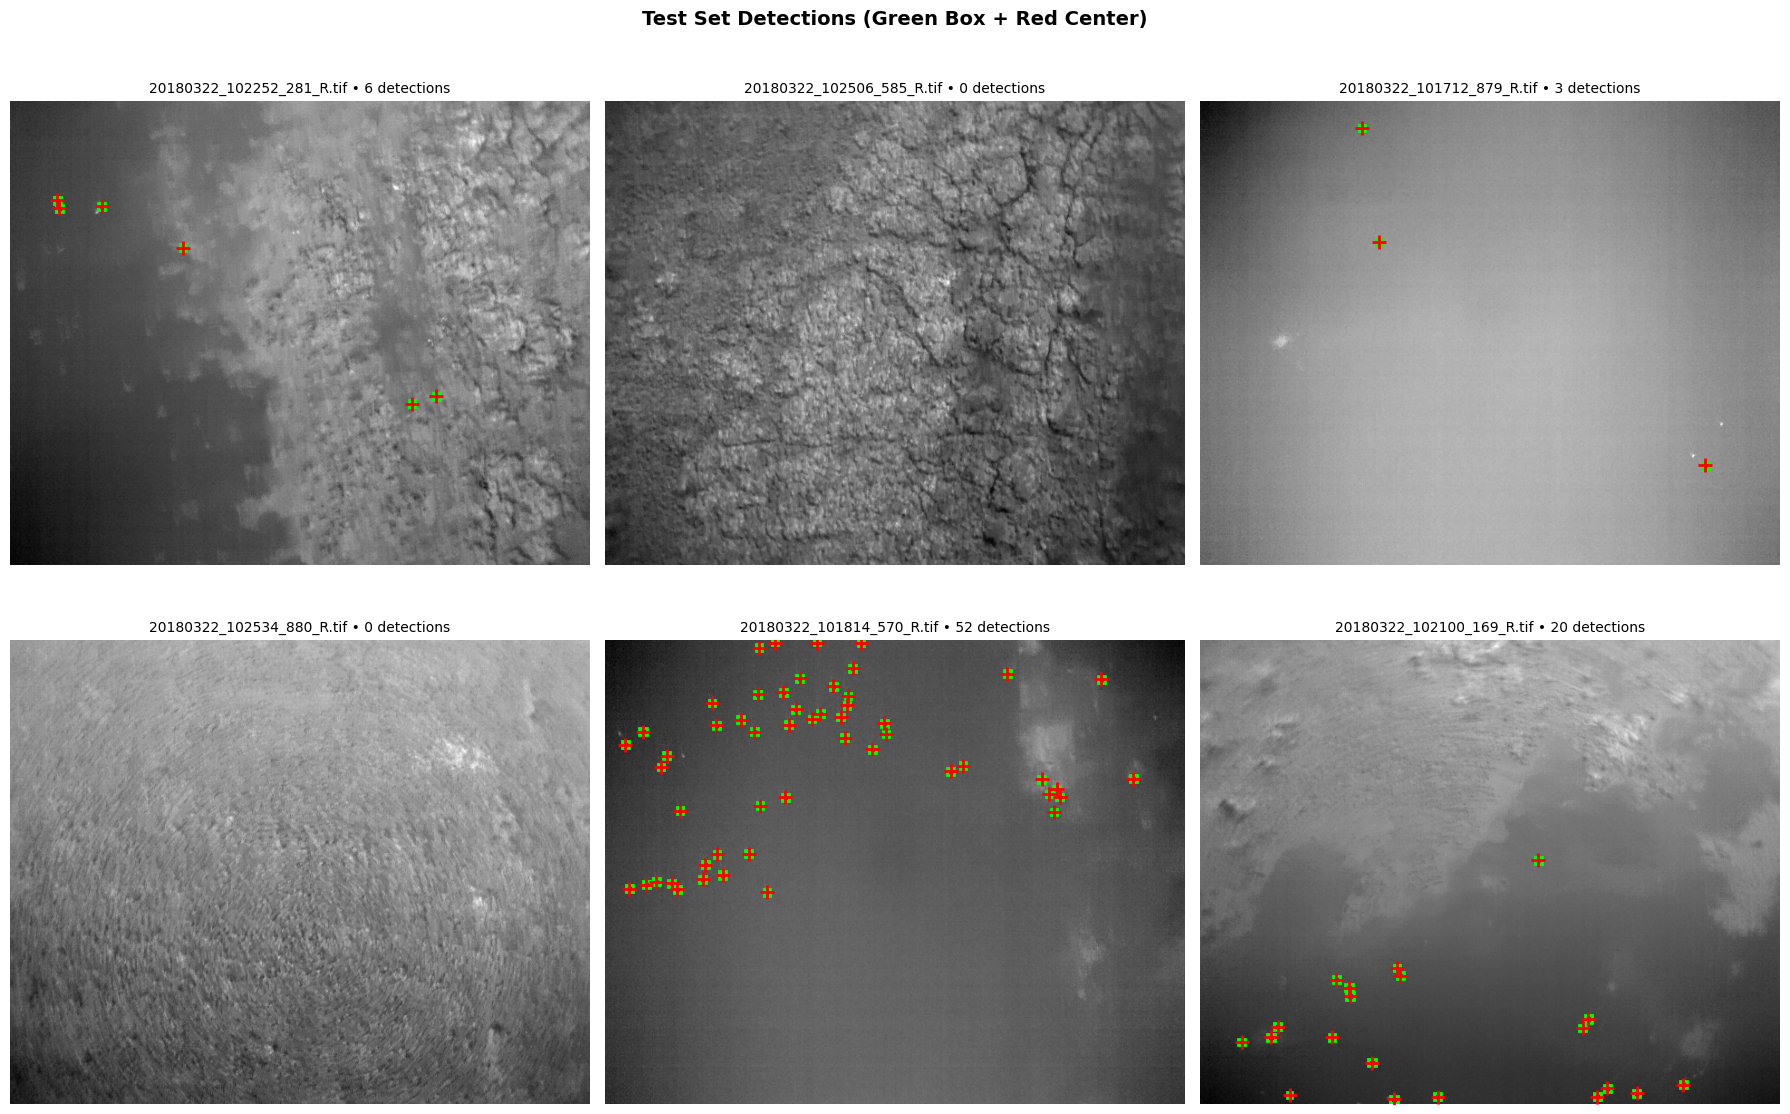

In [ ]:
# ───────────────────────────────────────────────────────
# VISUALIZE TEST DETECTIONS (green boxes + red centers)
# ───────────────────────────────────────────────────────
import cv2, random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

print("\n  Visualizing sample test detections...")

test_images_dir = '/content/waterfowl_yolo_dataset/images/test'  # keep same dataset root
test_imgs = [f for f in os.listdir(test_images_dir)
             if f.lower().endswith(('.tif', '.tiff', '.png', '.jpg', '.jpeg'))]

if len(test_imgs) == 0:
    print("  No images found in test folder:", test_images_dir)
else:
    samples = random.sample(test_imgs, min(6, len(test_imgs)))  # show up to 6
    rows, cols = 2, 3
    fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
    axes = axes.ravel()

    for ax, name in zip(axes, samples):
        img_path = os.path.join(test_images_dir, name)

        # Run YOLO on this image
        r = model.predict(source=img_path, conf=0.25, iou=0.45, verbose=False)[0]

        # Load image safely (TIFF-friendly), convert for display
        img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
        if img is None:
            ax.set_title(f"{name} (read error)")
            ax.axis('off')
            continue

        if len(img.shape) == 2:
            disp = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            disp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Normalize for cleaner viewing
        disp = cv2.normalize(disp, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

        ax.imshow(disp, cmap='gray')
        ax.axis('off')

        # Draw YOLO predicted boxes (green) + centers (red '+')
        if r.boxes is not None and len(r.boxes) > 0:
            xyxy = r.boxes.xyxy.cpu().numpy()
            for (x1, y1, x2, y2) in xyxy:
                w, h = x2 - x1, y2 - y1
                rect = patches.Rectangle((x1, y1), w, h,
                                         linewidth=2, edgecolor='lime', facecolor='none')
                ax.add_patch(rect)
                ax.plot(x1 + w/2, y1 + h/2, 'r+', markersize=10, markeredgewidth=2)

        ax.set_title(f"{name} • {len(r.boxes) if r.boxes is not None else 0} detections",
                     fontsize=10)

    # If fewer than 6 images, hide extra subplots
    for k in range(len(samples), rows*cols):
        axes[k].axis('off')

    plt.suptitle("Test Set Detections (Green Box + Red Center)", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


ERROR ANALYSIS

 Analyzing 83 test images...

 Detection Statistics:
    Images with detections: 53
    Perfect count matches:  9
    False Positives:        1 (detected birds where none exist)
    False Negatives:        1 (missed all birds in image)

 Generating visualizations...


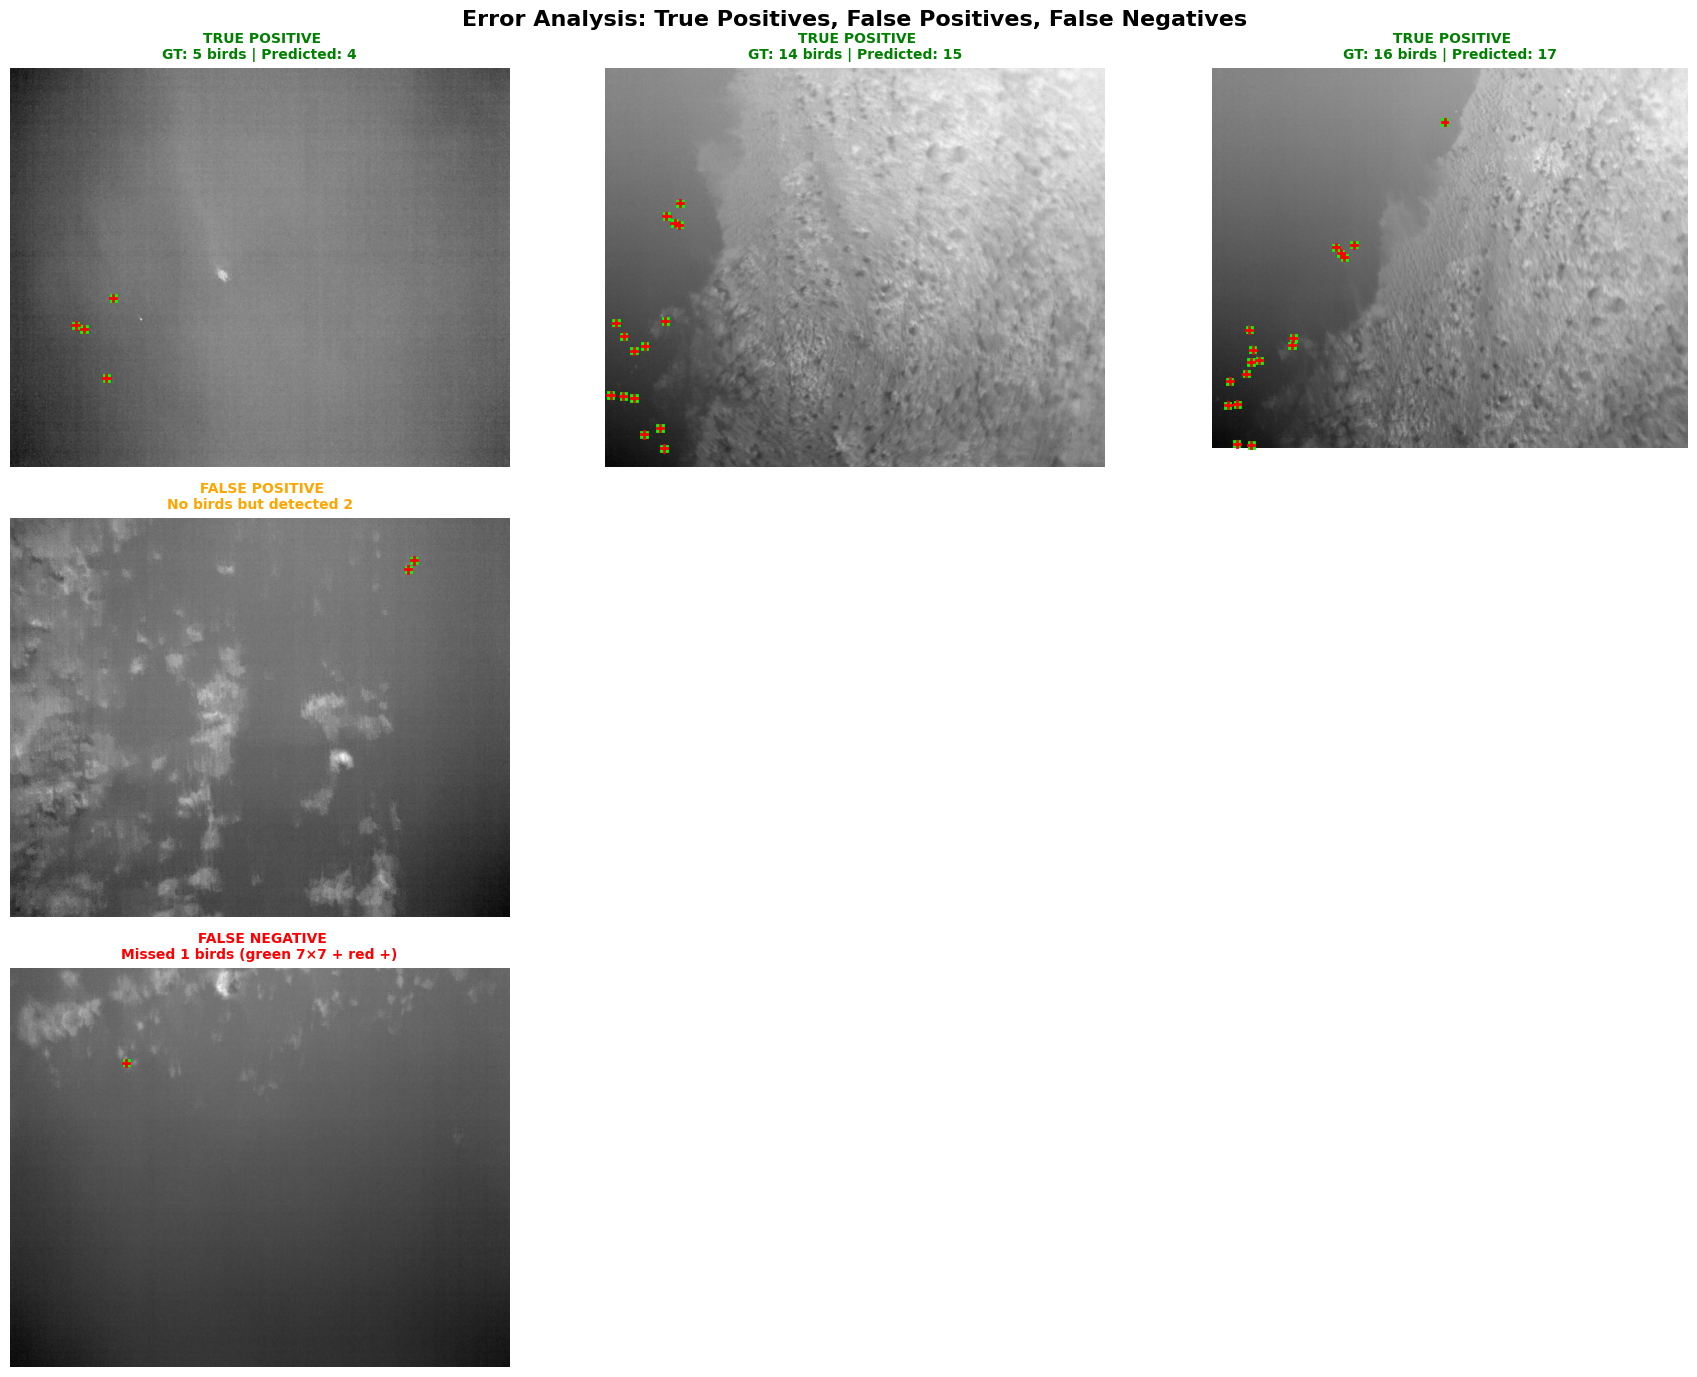


 Error analysis complete!


In [ ]:
# ═══════════════════════════════════════════════════════
# ERROR ANALYSIS WITH VISUALIZATIONS
# ═══════════════════════════════════════════════════════
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

print("="*60)
print("ERROR ANALYSIS")
print("="*60)

model = YOLO('waterfowl_detection/thermal_yolov8n_final/weights/best.pt')

test_images_dir = '/content/waterfowl_yolo_dataset/images/test'
test_labels_dir = '/content/waterfowl_yolo_dataset/labels/test'

test_images = sorted([f for f in os.listdir(test_images_dir) if f.endswith('.tif')])

print(f"\n Analyzing {len(test_images)} test images...")

# Categories
true_positives = []    # Good detections
false_positives = []   # Detected birds where none exist
false_negatives = []   # Missed actual birds
perfect_matches = []   # Perfect detection count

for img_name in test_images:
    img_path = os.path.join(test_images_dir, img_name)
    label_path = os.path.join(test_labels_dir, img_name.replace('.tif', '.txt'))

    # Get ground truth count
    gt_count = 0
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()
            gt_count = len([l for l in lines if l.strip()])

    # Get predictions
    results = model.predict(img_path, conf=0.25, iou=0.45, verbose=False)
    pred_count = len(results[0].boxes)

    # Categorize
    if pred_count > 0 and gt_count > 0:
        if abs(pred_count - gt_count) <= 1:  # Close match
            true_positives.append((img_name, gt_count, pred_count, 'good'))
        else:
            true_positives.append((img_name, gt_count, pred_count, 'mismatch'))

    if pred_count == gt_count and gt_count > 0:
        perfect_matches.append((img_name, gt_count, pred_count))

    if pred_count > 0 and gt_count == 0:
        false_positives.append((img_name, pred_count))

    if pred_count == 0 and gt_count > 0:
        false_negatives.append((img_name, gt_count))

print(f"\n Detection Statistics:")
print(f"    Images with detections: {len(true_positives)}")
print(f"    Perfect count matches:  {len(perfect_matches)}")
print(f"    False Positives:        {len(false_positives)} (detected birds where none exist)")
print(f"    False Negatives:        {len(false_negatives)} (missed all birds in image)")



# Visualize examples (styled like your GT viz: green 7×7 box + red '+')
print(f"\n Generating visualizations...")

import matplotlib.patches as patches

BOX_SIZE = 7
HALF = BOX_SIZE / 2.0

def load_img_for_display(path):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if img is None:
        return None, None, None
    # grayscale -> RGB
    if len(img.shape) == 2:
        img_disp = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    else:
        img_disp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # normalize for nicer viewing in Colab
    img_disp = cv2.normalize(img_disp, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    H, W = img_disp.shape[:2]
    return img_disp, H, W

def draw_cross(ax, cx, cy, size=4, lw=2, color='r'):
    ax.plot([cx - size, cx + size], [cy, cy], color=color, linewidth=lw)
    ax.plot([cx, cx], [cy - size, cy + size], color=color, linewidth=lw)

def draw_fixed_box(ax, cx, cy, edgecolor='lime'):
    rect = patches.Rectangle((cx - HALF, cy - HALF), BOX_SIZE, BOX_SIZE,
                             linewidth=2, edgecolor=edgecolor, facecolor='none')
    ax.add_patch(rect)
    draw_cross(ax, cx, cy, size=4, lw=2, color='r')

def plot_predictions(ax, img_path, yolo_results):
    img_disp, H, W = load_img_for_display(img_path)
    ax.imshow(img_disp, cmap='hot')
    if yolo_results and len(yolo_results[0].boxes) > 0:
        # xywhn -> normalized center x,y, width, height
        xywhn = yolo_results[0].boxes.xywhn.cpu().numpy()
        for xc, yc, w, h in xywhn:
            cx, cy = xc * W, yc * H
            draw_fixed_box(ax, cx, cy, edgecolor='lime')
    ax.axis('off')

def plot_ground_truth(ax, img_path, label_path):
    img_disp, H, W = load_img_for_display(img_path)
    ax.imshow(img_disp, cmap='hot')
    if os.path.exists(label_path):
        with open(label_path) as f:
            for line in f:
                if not line.strip():
                    continue
                _, xc, yc, w, h = map(float, line.split()[:5])
                cx, cy = xc * W, yc * H
                draw_fixed_box(ax, cx, cy, edgecolor='lime')
    ax.axis('off')

fig = plt.figure(figsize=(18, 14))

# Row 1: TRUE POSITIVES (Good detections)
if true_positives:
    good_tps = [tp for tp in true_positives if tp[3] == 'good'][:3]
    for i, (img_name, gt, pred, _) in enumerate(good_tps):
        img_path = os.path.join(test_images_dir, img_name)
        res = model.predict(img_path, conf=0.25, iou=0.45, verbose=False)
        ax = plt.subplot(3, 3, i+1)
        plot_predictions(ax, img_path, res)
        ax.set_title(f' TRUE POSITIVE\nGT: {gt} birds | Predicted: {pred}',
                     fontsize=10, color='green', fontweight='bold')

# Row 2: FALSE POSITIVES (Preds where GT has none)
if false_positives:
    for i, (img_name, pred) in enumerate(false_positives[:3]):
        img_path = os.path.join(test_images_dir, img_name)
        res = model.predict(img_path, conf=0.25, iou=0.45, verbose=False)
        ax = plt.subplot(3, 3, i+4)
        plot_predictions(ax, img_path, res)
        ax.set_title(f' FALSE POSITIVE\nNo birds but detected {pred}',
                     fontsize=10, color='orange', fontweight='bold')

# Row 3: FALSE NEGATIVES (Missed all birds) — draw GT only
if false_negatives:
    for i, (img_name, gt) in enumerate(false_negatives[:3]):
        img_path = os.path.join(test_images_dir, img_name)
        label_path = os.path.join(test_labels_dir, img_name.replace('.tif', '.txt'))
        ax = plt.subplot(3, 3, i+7)
        plot_ground_truth(ax, img_path, label_path)
        ax.set_title(f' FALSE NEGATIVE\nMissed {gt} birds (green 7×7 + red +)',
                     fontsize=10, color='red', fontweight='bold')

plt.suptitle('Error Analysis: True Positives, False Positives, False Negatives',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n Error analysis complete!")
print("="*60)


ADDITIONAL VISUALIZATIONS

 Confusion Matrix:


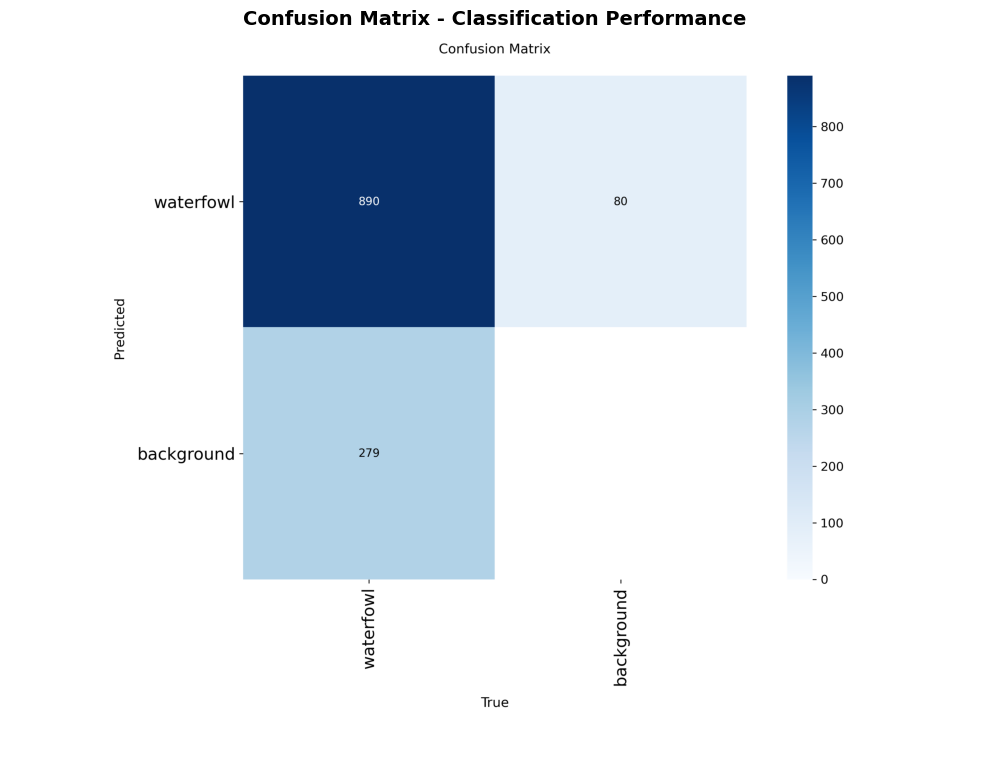


 All visualizations displayed!


In [ ]:
# ═══════════════════════════════════════════════════════
# DISPLAY CONFUSION MATRIX AND PREDICTIONS
# ═══════════════════════════════════════════════════════
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

results_dir = 'waterfowl_detection/thermal_yolov8n_final'

print("="*60)
print("ADDITIONAL VISUALIZATIONS")
print("="*60)

# Confusion Matrix
confusion_path = f'{results_dir}/confusion_matrix.png'
if os.path.exists(confusion_path):
    print("\n Confusion Matrix:")
    img = mpimg.imread(confusion_path)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(img)
    ax.axis('off')
    plt.title('Confusion Matrix - Classification Performance', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# F1 Confidence Curve
f1_curve_path = f'{results_dir}/F1_curve.png'
if os.path.exists(f1_curve_path):
    print("\n F1-Confidence Curve:")
    img = mpimg.imread(f1_curve_path)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img)
    ax.axis('off')
    plt.title('F1 Score vs Confidence Threshold', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# PR Curve
pr_curve_path = f'{results_dir}/PR_curve.png'
if os.path.exists(pr_curve_path):
    print("\n Precision-Recall Curve:")
    img = mpimg.imread(pr_curve_path)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img)
    ax.axis('off')
    plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("\n All visualizations displayed!")
print("="*60)